# The Role of Caffeine, Alcohol, Smoking, Exercise, and Sleep Duration in Sleep Efficiency

### A Behavioral Data Analysis Project Using SQL and Python


# 📄 Project Description
This section provides a comprehensive overview of the project’s goals, background, and significance, outlining the key factors analyzed and the intended impact on individuals, healthcare, and public health policy.

---

## Project Overview

### Problem Statement

Sleep quality has a profound impact on daily functioning, health, and productivity. While the number of hours slept is commonly emphasized, other behavioral and lifestyle factors can significantly affect sleep efficiency — a measure of how effectively one sleeps.

This project investigates the influence of behavioral factors such as caffeine intake, alcohol use, smoking, exercise frequency, and sleep duration on sleep efficiency. The goal is to identify patterns that can support better personal habits, healthcare decisions, and public health strategies.

---

### Project Objectives

- Analyze behavioral and demographic factors associated with poor sleep efficiency.
- Provide actionable insights to improve sleep quality.
- Demonstrate data profiling, SQL-based querying, and statistical analys for querying and analysis.

---

### Key Variables

- **Target Variable:** Sleep Efficiency  
- **Primary Predictors:**  
  - Caffeine Consumption  
  - Alcohol Consumption  
  - Smoking Status  
  - Exercise Frequency  
  - Sleep Duration  
- **Additional Attributes:**  
  - Age  
  - Gender  
  - Bedtime / Wakeup Time  
  - REM, Deep, Light Sleep Percentages  
  - Awakenings

---

### Scope and Limitations

**Strengths:**

- Includes both behavioral and demographic factors
- Balanced use of categorical and numerical data

**Limitations:**

- Small sample size (452 records)
- Possible self-reporting bias (e.g., caffeine, alcohol, smoking)
- Region-specific data (collected in Morocco), limiting generalizability
- Missing information on clinical factors like stress levels, health conditions, or sleep disorders

---


## Research Background

Although sleep health is a well-studied area, there is limited research specifically examining how multiple behavioral factors—such as caffeine intake, alcohol use, smoking, exercise, and sleep duration—interact to affect sleep efficiency:

- **Caffeine and Sleep Disruption:**  
  Research shows that caffeine consumed even six hours before bedtime can significantly reduce sleep time and quality.  
  Access: [Caffeine Effects on Sleep Taken 0, 3, or 6 Hours Before Bedtime](https://pmc.ncbi.nlm.nih.gov/articles/PMC3805807/)

- **Sleep Quality in Cigarette Smokers and Nonsmokers:**  
  A 2019 study analyzing a large representative sample found that cigarette smokers reported significantly poorer sleep quality compared to nonsmokers.  
  Access: [Sleep Quality in Cigarette Smokers and Nonsmokers](https://pubmed.ncbi.nlm.nih.gov/31234809/)

---

## Business Impact

- **Individuals:** Gain actionable insights to improve sleep habits, boosting health and daily performance.  
- **Healthcare Providers:** Inform better diagnosis, treatment, and prevention of sleep-related issues based on behavioral factors.  
- **Governments and Public Health Officials:** Guide policies and programs that promote healthier lifestyles and improve population sleep quality.


# 📦 Data SourcingThis section details the origin and basic characteristics of the Sleep Efficiency dataset used in this project



- **File Name:** Sleep_Efficiency  
- **File Format:** CSV  
- **Dataset Dimensions:** 452 rows × 15 columns  
- **File Size:** ~40.3 KB  
- **Source:** [Kaggle – Sleep Efficiency Dataset](https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency)  
- **License & Attribution:**  
  This dataset was originally collected by a group of artificial intelligence engineering students at ENSIAS (Morocco).  
  It is publicly available and free to download on Kaggle. © Original Authors.  

- **Description:**  
  This dataset captures individual sleep patterns along with behavioral and lifestyle factors including:
  - **Caffeine consumption**
  - **Alcohol intake**
  - **Smoking status**
  - **Exercise frequency**  
  It also includes **demographic attributes** such as **age** and **gender**, and sleep-related measures like **bedtime**, **wake-up time**, **REM/Deep/Light sleep**, and **Sleep efficiency**.

- **Data Collection Strategy:**  
  The dataset was initially downloaded from Kaggle, then uploaded to a GitHub repository
  In this project, it was loaded directly from the raw GitHub URL into a Python environment and stored in an in-memory SQLite database for analysis.


# 🧪 Data Profiling
This section presents a detailed examination of the dataset's structure, quality, and initial patterns before any transformation or modeling takes place.


## Data Loading & Setup  📥 

- Loaded dataset directly from GitHub as a CSV into a Pandas DataFrame
- Created an in-memory SQLite database using `sqlite3.connect(":memory:")`
- Saved the DataFrame to SQLite as a table named `Sleep_Efficiency`
- Previewed the first 10 records to confirm successful loading

In [115]:
# Imports
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import norm
from scipy.stats import ttest_ind
import statsmodels.api as sm
from scipy.stats import ttest_ind, pearsonr


warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [2]:
# Load the CSV directly from GitHub
url = "https://raw.githubusercontent.com/JassemShe/The-Role-of-Caffeine-Alcohol-Smoking-Exercise-and-Sleep-Duration-in-Sleep-Efficiency/main/data/raw/Sleep_Efficiency.csv"
df = pd.read_csv(url)

In [3]:
# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")

In [4]:
# Load DataFrame into the SQLite database
df.to_sql("Sleep_Efficiency", conn, index=False, if_exists='replace')

452

In [5]:
# Show data
pd.read_sql("SELECT * FROM Sleep_Efficiency LIMIT 10", conn)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,NaN,0.0,No,1.0
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,0.54,28,25,47,2.0,50.0,0.0,Yes,1.0
7,8,53,Male,2021-08-16 00:30:00,2021-08-16 10:30:00,10.0,0.90,28,52,20,0.0,50.0,0.0,Yes,3.0
8,9,41,Female,2021-04-05 02:30:00,2021-04-05 08:30:00,6.0,0.79,28,55,17,3.0,50.0,0.0,No,1.0
9,10,11,Female,2021-09-16 01:00:00,2021-09-16 10:00:00,9.0,0.55,18,37,45,4.0,0.0,0.0,No,0.0


In [6]:
# Count rows
pd.read_sql("SELECT COUNT(*) AS total_rows FROM Sleep_Efficiency", conn)

,total_rows
0,452


## Missing Values Analysis ❓

As part of the data profiling process, all columns were assessed for missing values using SQL. The results are summarized below:

### Missing Value Counts

| Column                 | Missing Values | Action Taken                        |
|------------------------|----------------|-------------------------------------|
| Awakenings             | 20             | Removed (not safely imputed as 0)   |
| Caffeine consumption   | 25             | Imputed with 0 (REM analysis)       |
| Alcohol consumption    | 14             | Imputed with 0 (Awakenings analysis)|
| Exercise frequency     | 6              | Imputed with 0 (minor impact)       |

### Observations

- Records with missing `Awakenings` had a distinct sleep efficiency profile, suggesting they are not equivalent to zero awakenings and were therefore removed.
- Missing values in `Caffeine consumption`, `Alcohol consumption`, and `Exercise frequency` were imputed with 0 based on distributional similarities with low or no intake/ysis and modeling.
 into the dataset.


In [7]:
# Generate a dynamic SQL query for null counts, handling column names safely
columns = df.columns

null_query = "SELECT\n" + ",\n".join(
    [f"SUM(CASE WHEN [{col}] IS NULL THEN 1 ELSE 0 END) AS [{col}_nulls]" for col in columns]
) + "\nFROM Sleep_Efficiency;"

# Execute the query
pd.read_sql(null_query, conn)

,ID_nulls,Age_nulls,Gender_nulls,Bedtime_nulls,Wakeup time_nulls,Sleep duration_nulls,Sleep efficiency_nulls,REM sleep percentage_nulls,Deep sleep percentage_nulls,Light sleep percentage_nulls,Awakenings_nulls,Caffeine consumption_nulls,Alcohol consumption_nulls,Smoking status_nulls,Exercise frequency_nulls
0,0,0,0,0,0,0,0,0,0,0,20,25,14,0,6


### Handling Missing Values in the `Awakenings` Column
. To decide how to handle these, we compared the average `Sleep efficiency` across different groups:

- Records where `Awakenings` is **NULL**
- Records where `Awakenings` equals **0**
- Records where `Awakenings` is **not zero**

The SQL queries below calculate these averages to help guide our decision.


In [8]:
# Mean sleep efficiency where Awakenings IS NULL
pd.read_sql("""
SELECT AVG([Sleep efficiency]) AS avg_efficiency_null_awakenings
FROM Sleep_Efficiency
WHERE [Awakenings] IS NULL
""", conn)

,avg_efficiency_null_awakenings
0,0.7915


In [9]:
# Mean sleep efficiency where Awakenings = 0
pd.read_sql("""
SELECT AVG([Sleep efficiency]) AS avg_efficiency_awakenings_zero
FROM Sleep_Efficiency
WHERE [Awakenings] = 0
""", conn)

,avg_efficiency_awakenings_zero
0,0.912316


In [10]:
# Mean sleep efficiency where Awakenings != 0 and Sleep efficiency is NOT NULL
pd.read_sql("""
SELECT AVG([Sleep efficiency]) AS avg_efficiency_nonzero_awakenings
FROM Sleep_Efficiency
WHERE [Awakenings] != 0 AND [Sleep efficiency] IS NOT NULL
""", conn)

,avg_efficiency_nonzero_awakenings
0,0.753976


**Observation:**  
The average sleep efficiency for records with NULL `Awakenings`  0.79) is closer to those with at least one awakening  0.76) than to those with zero awakenings  0.91). 

 This suggests that the missing values likely do **not** represent zero awakenings. Therefore, it is reasonable to remove these records instead of imputing zeros
.


<hr>

### Handling Missing Values in the `Caffeine consumption` Column

The dataset contains 25 missing values in the `Caffeine consumption` column. Since caffeine is scientifically shown to reduce REM sleep percentage, we compare the average REM sleep percentage for:

- Records where `Caffeine consumption` is **NULL**
- Records where `Caffeine consumption` equals **0** (no caffeine)
- Records where `Caffeine consumption` is **not zero**

This will help us assess whether missing caffeine data can be reasonably imputed or should be handled differently.


In [11]:
# Average REM sleep percentage where Caffeine consumption IS NULL
pd.read_sql("""
SELECT AVG([REM sleep percentage]) AS avg_rem_null_caffeine
FROM Sleep_Efficiency
WHERE [Caffeine consumption] IS NULL
""", conn)

,avg_rem_null_caffeine
0,22.48


In [12]:
# Average REM sleep percentage where Caffeine consumption = 0
pd.read_sql("""
SELECT AVG([REM sleep percentage]) AS avg_rem_zero_caffeine
FROM Sleep_Efficiency
WHERE [Caffeine consumption] = 0
""", conn)


,avg_rem_zero_caffeine
0,22.393365


In [13]:
# Average REM sleep percentage where Caffeine consumption != 0 and REM sleep percentage IS NOT NULL
pd.read_sql("""
SELECT AVG([REM sleep percentage]) AS avg_rem_nonzero_caffeine
FROM Sleep_Efficiency
WHERE [Caffeine consumption] != 0 AND [REM sleep percentage] IS NOT NULL
""", conn)

,avg_rem_nonzero_caffeine
0,22.847222


**Observation:**  
The average REM sleep percentage for records with missing `Caffeine consumption` (22.48%) is very close to those with zero caffeine intake (22.39%) and those with non-zero caffeine intake (22.85%). 

 Since the differences are minimal and not statistically significant, we will impute missing `Caffeine consumption` values with **0** (assuming no caffeine consumption)
.


<hr>

### Handling Missing Values in the `Alcohol consumption` Column

There are 14 missing values in the `Alcohol consumption` column. Since alcohol consumption is known to increase the number of awakenings during the night, we compare the average number of awakenings between:

- Records with `Alcohol consumption` **NULL**
- Records with `Alcohol consumption` = **0** (no alcohol)
- Records with `Alcohol consumption` ≠ **0** (alcohol consumed)

This comparison will guide us on how to handle the missing values.


In [14]:
# Average Awakenings where Alcohol consumption IS NULL
pd.read_sql("""
SELECT AVG([Awakenings]) AS avg_awakenings_null_alcohol
FROM Sleep_Efficiency
WHERE [Alcohol consumption] IS NULL
""", conn)


,avg_awakenings_null_alcohol
0,1.714286


In [15]:
# Average Awakenings where Alcohol consumption = 0
pd.read_sql("""
SELECT AVG([Awakenings]) AS avg_awakenings_zero_alcohol
FROM Sleep_Efficiency
WHERE [Alcohol consumption] = 0
""", conn)


,avg_awakenings_zero_alcohol
0,1.4375


In [16]:
# Average Awakenings where Alcohol consumption != 0 and Awakenings IS NOT NULL
pd.read_sql("""
SELECT AVG([Awakenings]) AS avg_awakenings_nonzero_alcohol
FROM Sleep_Efficiency
WHERE [Alcohol consumption] != 0 AND [Awakenings] IS NOT NULL
""", conn)

,avg_awakenings_nonzero_alcohol
0,1.910112


**Observation:**  
The average number of awakenings for records with missing `Alcohol consumption` (1.71) is higher than those reporting no alcohol consumption (1.44) and closer to those with reported alcohol intake (1.91). This suggests the missing values may correspond to actual alcohol consumption and should be handled carefully, possibly by removal to avoid bias from inaccurate imputation.


<hr>

### Handling Missing Values in the `Exercise_frequency` Column

There are 6 missing values in the `Exercise_frequency` column. Since the number is small and the difference in relevant metrics is not significant, these missing values will be imputed as **0** (assuming no exercise) to maintain data completeness.


In [17]:
# Average Sleep efficiency for NULL and zero exercise frequency
pd.read_sql("""
SELECT 
  AVG([Sleep efficiency]) AS avg_efficiency_null_exercise,
  AVG(CASE WHEN [Exercise frequency] = 0 THEN [Sleep efficiency] ELSE NULL END) AS avg_efficiency_zero_exercise
FROM Sleep_Efficiency
WHERE [Exercise frequency] IS NULL OR [Exercise frequency] = 0
""", conn)


,avg_efficiency_null_exercise,avg_efficiency_zero_exercise
0,0.745246,0.743879


<hr>

## Data Type and Consistency Checks 🧩

During profiling, all columns were reviewed for data types, uniqueness, and internal consistency using both SQLite and pandas.

### Column Type Overview

- Most columns were correctly typed as `INTEGER`, `REAL`, or `TEXT` in SQLite.
- `Bedtime` and `Wakeup time` were stored as `TEXT`, which may require transformation into proper `datetime` or `time` objects for further analysis.
- All other numeric columns (e.g., `Sleep duration`, `Sleep efficiency`, `Awakenings`) were recognized correctly.

### Consistency Observations

- `Sleep duration` had only **9 unique values** across 452 records, suggesting limited granularity (possibly due to rounding or collection method).
- `REM sleep percentage` had **13 unique values**, while `Deep` and `Light` sleep percentages had **29 each**. This inconsistency in granularity may reflect differences in measurementstent labels.
- Logical check: the **sum of REM, Deep, and Light sleep percentages** was validated to be approximately **100%** for all records.

These checks confirm that most features are properly structured and internally consistent. Some transformations (e.g., time parsing) may be applied during data wrangling.


In [18]:
pd.read_sql("""
PRAGMA table_info(Sleep_Efficiency)
""", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,ID,INTEGER,0,None,0
1,1,Age,INTEGER,0,None,0
2,2,Gender,TEXT,0,None,0
3,3,Bedtime,TEXT,0,None,0
4,4,Wakeup time,TEXT,0,None,0
5,5,Sleep duration,REAL,0,None,0
6,6,Sleep efficiency,REAL,0,None,0
7,7,REM sleep percentage,INTEGER,0,None,0
8,8,Deep sleep percentage,INTEGER,0,None,0
9,9,Light sleep percentage,INTEGER,0,None,0


In [19]:
columns = df.columns

unique_counts = []
for col in columns:
    sql = f"SELECT COUNT(DISTINCT [{col}]) AS unique_count FROM Sleep_Efficiency"
    result = pd.read_sql(sql, conn)
    result['column'] = col
    unique_counts.append(result)

pd.concat(unique_counts, ignore_index=True)[['column', 'unique_count']]

,column,unique_count
0,ID,452
1,Age,61
2,Gender,2
3,Bedtime,424
4,Wakeup time,434
5,Sleep duration,9
6,Sleep efficiency,50
7,REM sleep percentage,13
8,Deep sleep percentage,29
9,Light sleep percentage,29


### Data Type and Unique Value Observations

### 1. Bedtime and Wakeup Time Columns
Both `Bedtime` and `Wakeup time` are currently stored as **TEXT**. These should be converted into proper **datetime objects** to enable time-based calculations (e.g., sleep start/end, sleep latency).  
Depending on the format, we may also consider **splitting** each into two columns: `Bedtime_date`, `Bedtime_time`, etc., if date and time components are needed separately.

---

### 2. Sleep Duration – Unusual Uniqueness
There are only **9 unique values** in the `Sleep duration` column despite having **452 records**. This suggests that:
- The sleep duration data may have been **rounded**, **bucketed**, or **pre-processed**, reducing its granularity.
- We will need to verify whether this level of coarseness is acceptable for our analysis.

---

### 3. REM, Deep, and Light Sleep Percentages – Range Comparison
- `REM sleep percentage`: only **13 unique values**
- `Deep sleep percentage`: **29 unique values**
- `Light sleep percentage`: **29 unique values**

This disparity may indicate that REM values were **recorded at a lower precision**, or the **measurement method differs** from that of deep and light sleep. We will explore this further to understand if it reflects real-world distribution or a data quality issue.

---

### 4. Caffeine Consumption – Limited Value Range
`Caffeine consumption` contains only **7 unique values**, which suggests the data was likely collected using **predefined categories** (e.g., 0 mg, 50 mg, 100 mg, etc.) rather than open-ended input.  
This should be kept in mind during modeling, as the variable behaves more like an **ordinal categorical** feature than a truly continuous one.

---


 **Consistency Check: Sum of Sleep Stage Percentages**

Sleep stage percentages (`REM sleep percentage`, `Deep sleep percentage`, and `Light sleep percentage`) are expected to sum approximately to 100% for each record, reflecting the total sleep composition.

We perform a check to identify records where this sum deviates significantly from 100%, indicating possible data quality issues that need further investigation or correction.


In [20]:
query = """
SELECT 
    COUNT(*) AS total_records,
    SUM(CASE WHEN 
        ABS(
            ([REM sleep percentage] + [Deep sleep percentage] + [Light sleep percentage]) - 100
        ) > 1 THEN 1 ELSE 0 END) AS records_with_sum_not_approx_100
FROM Sleep_Efficiency;
"""

result = pd.read_sql(query, conn)
print(result)

   total_records  records_with_sum_not_approx_100
0            452                                0


**Observation:**  
All records in the dataset have the sum of `REM sleep percentage`, `Deep sleep percentage`, and `Light sleep percentage` close to 100%. This confirms the internal consistency of sleep stage data, and no correction is required for this aspect.


## Feature Distributions 📊

This section explores the distributions of key features in the dataset to understand their range, central tendency, and variability.

### Numeric Features

- Calculated summary statistics including mean, standard deviation, minimum, and maximum values for all numeric variables.
- Observed that some features like `Sleep duration` and sleep stage percentages have limited unique values, indicating possible rounding or discrete measurement scales.
- Visualized distributions using boxplots and histograms to identify outliers, skewness, and variability.

### Categorical Features

- Assessed the frequency counts of categorical variables such as `Gender`, `Smoking status`, and consumption levels.
- Noted that most categorical features have a limited set of distinct categories, facilitating grouping  for modeling.
 for modeling.


In [21]:
# Get column names and data types from df
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


# Get numeric stats using SQLite queries
def get_numeric_stats_sqlite(column):
    query = f"""
    SELECT
      AVG([{column}]) AS mean,
      MIN([{column}]) AS min,
      MAX([{column}]) AS max,
      -- SQLite doesn't have STDDEV, approximate variance and stddev:
      AVG( ([{column}] - (SELECT AVG([{column}]) FROM Sleep_Efficiency)) * 
           ([{column}] - (SELECT AVG([{column}]) FROM Sleep_Efficiency)) ) AS variance
    FROM Sleep_Efficiency
    WHERE [{column}] IS NOT NULL
    """
    res = pd.read_sql(query, conn).iloc[0]
    mean = res['mean']
    min_val = res['min']
    max_val = res['max']
    variance = res['variance']
    stddev = variance**0.5 if variance is not None else None
    return {'mean': mean, 'stddev': stddev, 'min': min_val, 'max': max_val}

# Collect stats for all numeric columns
numeric_summary = {}
for col in numeric_cols:
    numeric_summary[col] = get_numeric_stats_sqlite(col)

numeric_df = pd.DataFrame.from_dict(numeric_summary, orient='index')
print("\nNumeric Columns Summary:")
print(numeric_df)

# Get value counts for categorical columns
def get_value_counts_sqlite(column):
    query = f"""
    SELECT [{column}] AS value, COUNT(*) AS count
    FROM Sleep_Efficiency
    GROUP BY [{column}]
    ORDER BY count DESC
    """
    return pd.read_sql(query, conn)

for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(get_value_counts_sqlite(col))



Numeric Columns Summary:
                              mean      stddev   min     max
ID                      226.500000  130.480842   1.0  452.00
Age                      40.285398   13.157671   9.0   69.00
Sleep duration            7.465708    0.865666   5.0   10.00
Sleep efficiency          0.788916    0.135087   0.5    0.99
REM sleep percentage     22.615044    3.522060  15.0   30.00
Deep sleep percentage    52.823009   15.636909  18.0   75.00
Light sleep percentage   24.561947   15.296716   7.0   63.00
Awakenings                1.641204    1.355191   0.0    4.00
Caffeine consumption     23.653396   30.167398   0.0  200.00
Alcohol consumption       1.173516    1.619525   0.0    5.00
Exercise frequency        1.791480    1.426532   0.0    5.00

Value counts for 'Gender':
    value  count
0    Male    228
1  Female    224

Value counts for 'Bedtime':
                   value  count
0    2021-03-11 01:00:00      3
1    2021-12-29 00:00:00      2
2    2021-12-23 22:00:00      2
3    2

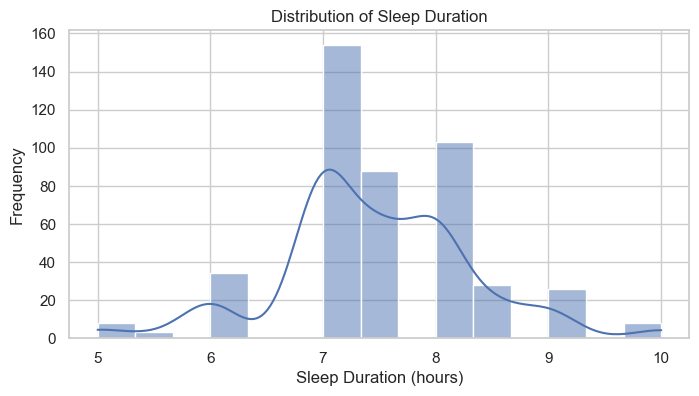

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Sleep duration"], bins=15, kde=True)
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


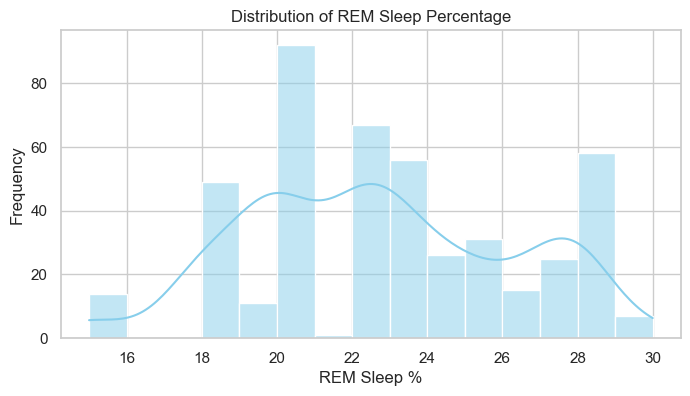

In [23]:
plt.figure(figsize=(8, 4))
sns.histplot(df["REM sleep percentage"], bins=15, kde=True, color='skyblue')
plt.title("Distribution of REM Sleep Percentage")
plt.xlabel("REM Sleep %")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

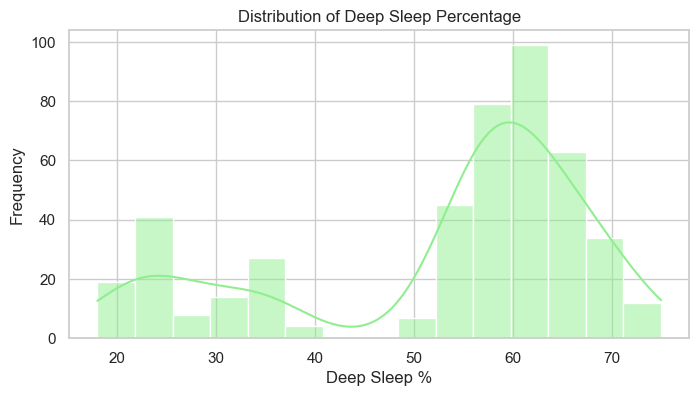

In [24]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Deep sleep percentage"], bins=15, kde=True, color='lightgreen')
plt.title("Distribution of Deep Sleep Percentage")
plt.xlabel("Deep Sleep %")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

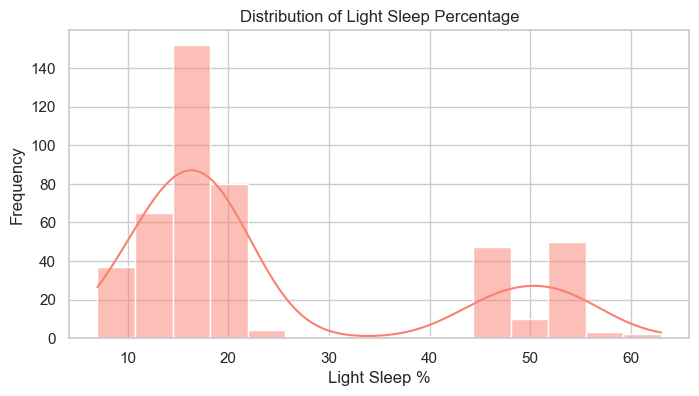

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Light sleep percentage"], bins=15, kde=True, color='salmon')
plt.title("Distribution of Light Sleep Percentage")
plt.xlabel("Light Sleep %")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

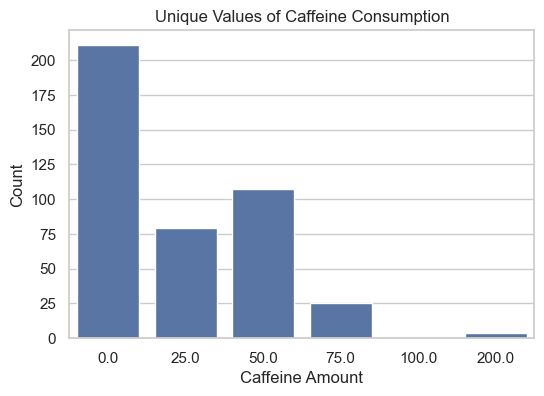

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Caffeine consumption", data=df)
plt.title("Unique Values of Caffeine Consumption")
plt.xlabel("Caffeine Amount")
plt.ylabel("Count")
plt.grid(True, axis='y')
plt.show()

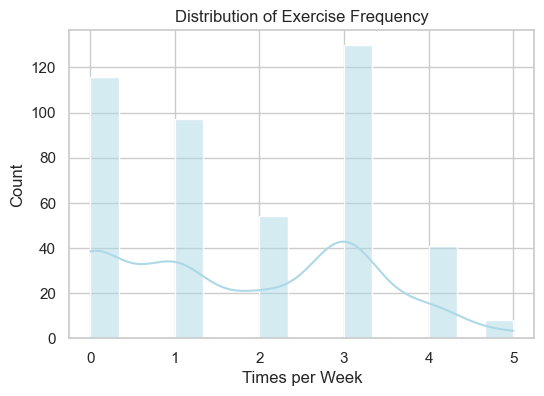

In [27]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Exercise frequency"], bins=15, kde=True, color="lightblue")
plt.title("Distribution of Exercise Frequency")
plt.xlabel("Times per Week")
plt.ylabel("Count")
plt.grid(True)
plt.show()


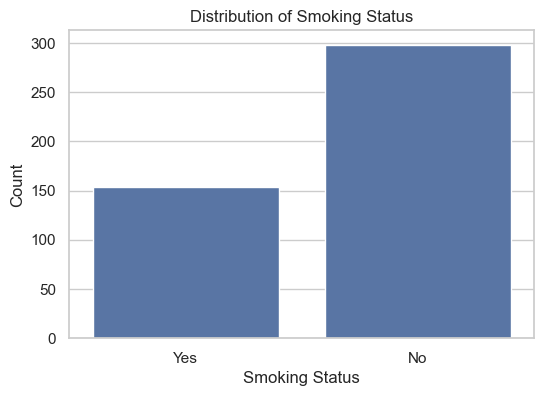

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Smoking status", data=df)
plt.title("Distribution of Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.grid(True, axis='y')
plt.show()


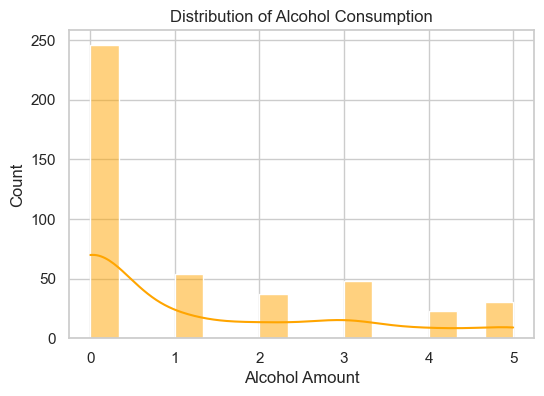

In [29]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Alcohol consumption"], bins=15, kde=True, color="orange")
plt.title("Distribution of Alcohol Consumption")
plt.xlabel("Alcohol Amount")
plt.ylabel("Count")
plt.grid(True)
plt.show()


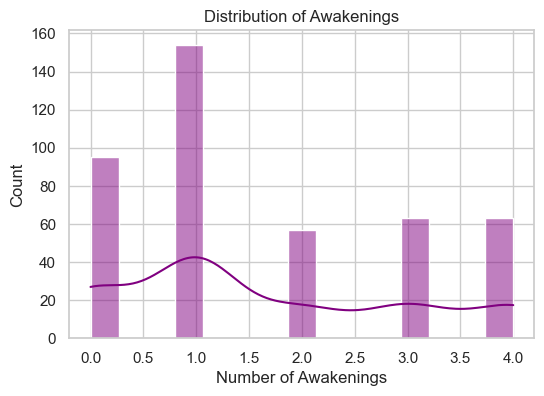

In [30]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Awakenings"], bins=15, kde=True, color="purple")
plt.title("Distribution of Awakenings")
plt.xlabel("Number of Awakenings")
plt.ylabel("Count")
plt.grid(True)
plt.show()


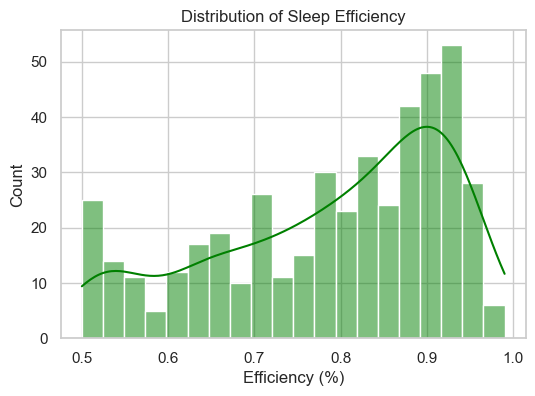

In [31]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Sleep efficiency"], bins=20, kde=True, color="green")
plt.title("Distribution of Sleep Efficiency")
plt.xlabel("Efficiency (%)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


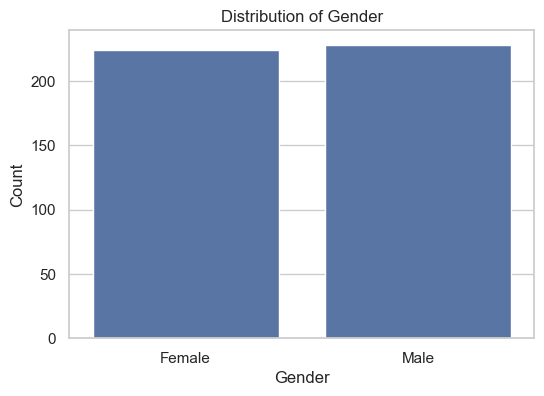

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=df)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(True, axis='y')
plt.show()


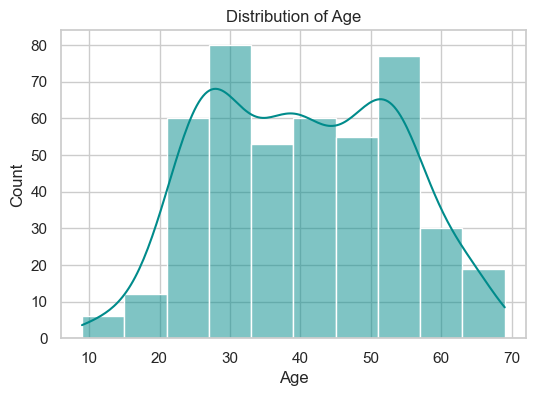

In [33]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=10, kde=True, color="darkcyan")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()

## Exploring Relationships Between Features 🔗

This section examines the associations and dependencies between variables to identify patterns and potential predictors of the target variable (`Sleep efficiency`).

### Key Analyses:

- Computed correlation matrix for numeric variables to quantify linear relationships.
- Identified strong positive correlations, such as between `Deep sleep percentage` and `Sleep efficiency`, and strong negative correlations, such as between `Light sleep percentage` and `Sleep efficiency`.
- Conducted group-wise comparisons of `Sleep efficiency` across categorical variables (e.g., `Smoking status`, `Gender`, `Alcohol consumption`, `Caffeine consumption`) using SQL queries and boxplots.
- Highlighted key insights, including the detrimental effect of smoking and alcohol consumption on sleep efficiency, and unexpected patterns related to caffeining steps.



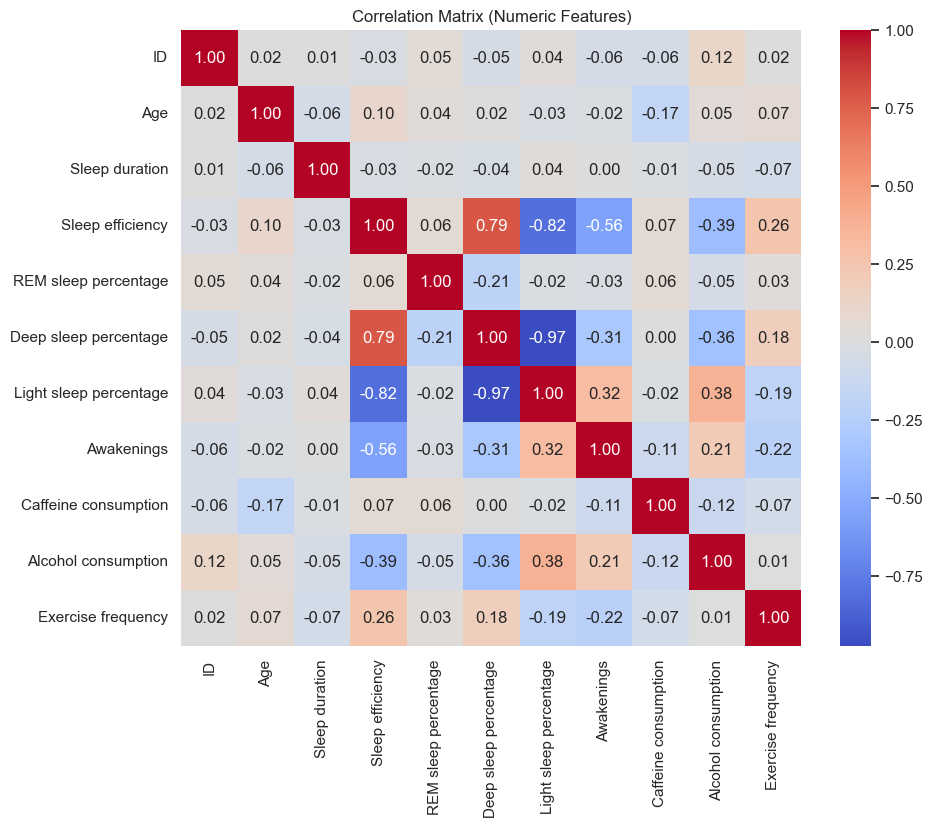

In [34]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

### Correlation Insights with Sleep Efficiency

From the correlation matrix, several interesting relationships with our target variable `Sleep efficiency` stand out:

#### Top Positive Correlations:
- `Deep sleep percentage`: **+0.79** — the strongest positive driver of sleep efficiency.
- `Exercise frequency`: **+0.26** — moderately associated with better sleep efficiency.

#### Top Negative Correlations:
- `Light sleep percentage`: **−0.82** — strongest inverse correlation, indicating that more light sleep is associated with lower efficiency.
- `Awakenings`: **−0.56** — supports the expectation that frequent wakeups reduce efficiency.
- `Alcohol consumption`: **−0.39** — aligns with the known disruptive effect of alcohol on sleep.

These patterns highlight which behavioral and physiological factors most strongly influence sleep efficiency in this dataset.

---

#### Variables Requiring Further Exploration:
- `Sleep duration`: Surprisingly shows a **weak correlation** with efficiency, prompting deeper investigation into how efficiency is defined and calculated.
- `Caffeine consumption`: Correlation is weak or unclear — its effect may depend on **timing** or **individual sensitivity**.
- **Categorical variables** like `Gender` and `Smoking status`: Need group-wise summaries or visualizations to assess their role.
- **Time-related fields** such as `Bedtime` and `Wakeup time`: Require conversion to time format and feature engineering to extract meaningful patterns (e.g., sleep onset delay, time-of-sleep analysis).

We will explore these in the next steps using SQL and visual group comparisons.



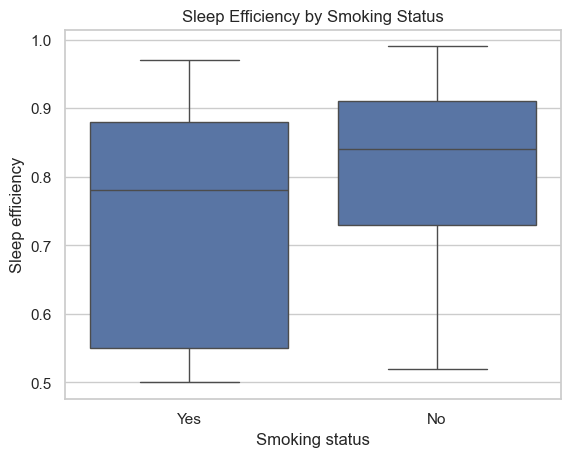

In [35]:
sns.boxplot(x="Smoking status", y="Sleep efficiency", data=df)
plt.title("Sleep Efficiency by Smoking Status")
plt.grid(True, axis='y')
plt.show()


**Observation:**  
Individuals who smoke have noticeably lower average sleep efficiency (**0.734**) compared to non-smokers (**0.817**). This aligns with existing research suggesting that smoking disrupts sleep quality. The difference is substantial enough to be considered in further analysis and modeling.

In [36]:
pd.read_sql("""
SELECT Gender, 
       COUNT(*) AS count,
       AVG([Sleep efficiency]) AS avg_sleep_efficiency
FROM Sleep_Efficiency
GROUP BY Gender
""", conn)


,Gender,count,avg_sleep_efficiency
0,Female,224,0.787545
1,Male,228,0.790263


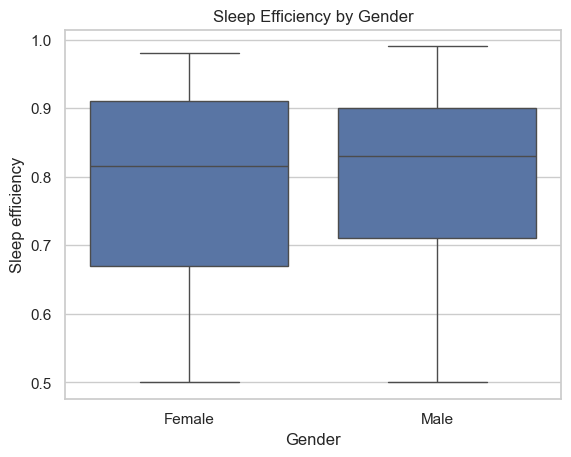

In [37]:
sns.boxplot(x="Gender", y="Sleep efficiency", data=df)
plt.title("Sleep Efficiency by Gender")
plt.grid(True, axis='y')
plt.show()


**Observation:**  
The average sleep efficiency between males (**0.790**) and females (**0.788**) is nearly identical, suggesting **no meaningful difference at the mean level**.

However, the **boxplot reveals subtle distribution differences**:
- **Females** have a **wider interquartile range**, indicating more variability in sleep efficienles.
- **Males** show a more compact distribution (narrower box), suggesting more consistent sleep efficiency but within a slightly lower obscure.

In [38]:
pd.read_sql("""
SELECT 
  CASE 
    WHEN [Alcohol consumption] = 0 THEN 'None'
    WHEN [Alcohol consumption] <= 1 THEN 'Low'
    WHEN [Alcohol consumption] <= 2.5 THEN 'Moderate'
    ELSE 'High'
  END AS alcohol_level,
  COUNT(*) AS count,
  AVG([Sleep efficiency]) AS avg_eff
FROM Sleep_Efficiency
GROUP BY alcohol_level
ORDER BY avg_eff DESC
""", conn)


,alcohol_level,count,avg_eff
0,None,246,0.832033
1,Low,54,0.803889
2,High,115,0.727478
3,Moderate,37,0.671351


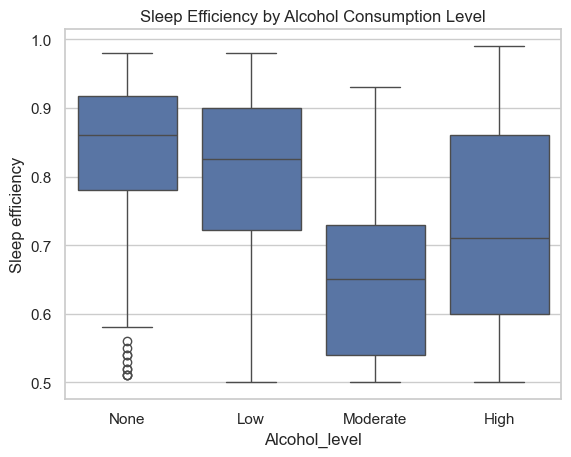

In [39]:
df["Alcohol_level"] = pd.cut(df["Alcohol consumption"],
                             bins=[-0.1, 0, 1, 2.5, df["Alcohol consumption"].max()],
                             labels=["None", "Low", "Moderate", "High"])

sns.boxplot(x="Alcohol_level", y="Sleep efficiency", data=df)
plt.title("Sleep Efficiency by Alcohol Consumption Level")
plt.grid(True, axis='y')
plt.show()


**Observation:**  
There is a clear negative relationship between alcohol consumption and sleep efficiency:

- Participants who **consume no alcohol** have the highest average sleep efficiency (**0.83**), 
- Those with **moderate consumption** show the lowest (**0.67**).

From the **boxplot visualization**, we see:
- The **"Moderate"** group is skewed heavily toward the **lower end** of sleep efficiency.
- The **"High"** group shows a **wider range**, spanning from low to moderate sleep efficiency — suggesting greater variability in sleep impact at higher levels.
- The **"None"** and **"Low"** groups have higher and more concentrated distributions.


In [40]:
pd.read_sql("""
SELECT 
  CASE 
    WHEN [Caffeine consumption] = 0 THEN 'None'
    WHEN [Caffeine consumption] <= 50 THEN 'Low'
    WHEN [Caffeine consumption] <= 100 THEN 'Moderate'
    ELSE 'High'
  END AS caffeine_level,
  COUNT(*) AS count,
  AVG([Sleep efficiency]) AS avg_eff
FROM Sleep_Efficiency
GROUP BY caffeine_level
ORDER BY avg_eff DESC
""", conn)


,caffeine_level,count,avg_eff
0,Moderate,26,0.847692
1,High,29,0.792069
2,None,211,0.786209
3,Low,186,0.783280


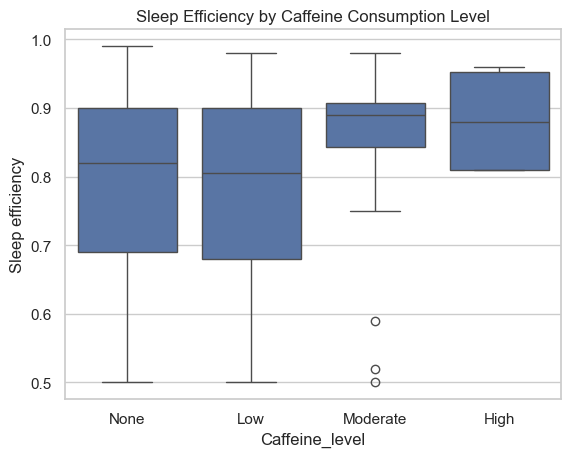

In [41]:
df["Caffeine_level"] = pd.cut(df["Caffeine consumption"],
                              bins=[-0.1, 0, 50, 100, df["Caffeine consumption"].max()],
                              labels=["None", "Low", "Moderate", "High"])

sns.boxplot(x="Caffeine_level", y="Sleep efficiency", data=df)
plt.title("Sleep Efficiency by Caffeine Consumption Level")
plt.grid(True, axis='y')
plt.show()


**Observation:**  
Contrary to common expectations, participants with **moderate caffeine consumption** show the **highest average sleep efficiency** (**0.85**), followed by high consumers (**0.79**). In contrast, those who consume **no or low caffeine** have **slightly lower average efficiency**.

The **boxplot further illustrates this counterintuitive trend**:
- **Moderate and high caffeine users** show a **more consistent concentration in the higher efficiency range**.
- In contrast, the **"None"** and **"Low"** groups exhibit **greater variability**, with sleep efficiency values spread between low and high.

This suggests that in this dataset, **moderate caffeine intake may not be associated with reduced sleep efficiency** — possibly due to individual tolerance, timing of consumption, or compensatory behaviors like physical activity.

Further analysis (e.g., interaction with exercise or bedtime) may be needed to understand these patterns more deeply.

# 🔧 Data Wrangling

This phase involved transforming the raw dataset into a clean, analysis-ready format.

- Removed records with missing values in the `awakenings` column, as analysis showed they could not be reliably interpreted as zero awakenings.

- Imputed missing values in `caffeine_consumption`, `alcohol_consumption`, and `exercise_frequency` with 0, based on distributional analysis showing they aligned with non-consumption patterns.

- Created an `age_group` categorical column by binning the continuous `age` variable into defined ranges using `pd.cut()`.

- Converted `bedtime_time` and `wakeup_time` columns from text to `datetime.time` using `pd.to_datetime()`.

- Extracted the date from `bedtime_time` (after confirming it matched `wakeup_time` date) into a single `date` column, and dropped redundant components.

- Created a `sleep_category` column that classifies `sleep_duration` into 'below_7', '7_to_9', or 'above_9' hours, representing general sleep adequacy.

- Created an `efficiency_level` column by categorizing `sleep_efficiency` into 'low', 'moderate', and 'high'.

- Created a `rem_sleep_assessment` column by comparing each individual’s `rem_sleep_percentage` to age-based recommended ranges.

- Dropped unreliable columns like `deep_sleep_percentage` and `light_sleep_percentage` due to inconsistent or implausible values.

- Created an `awakening_level` column classifying `awakenings` into age-specific categories: 'typical', 'better_than_average', and 'outside_typical_range'.

- Added a `caffeine_level` column categorizing intake as: "none" (0 mg), "low" (1–49 mg), "moderate" (50–99 mg), or "high" (100+ mg caffeine).

- Added an `alcohol_level` column: "none" (0 drinks), "low" (1–2), "moderate" (3–4), or "high" (5+).

- Added an `exercise_level` column: "none" (0 sessions), "some" (1–3 sessions), or "frequent" (4–5 sessions).

- Reordered DataFrame columns to group demographic, behavioral, and sleep metrics in a logical order.

- Converted `date`, `bedtime_time`, and `wakeup_time` columns to appropriate datetime formats.

- Cast key classification columns to `category` dtype to optimize memory and enable fast filtering.

- Created a new column `day_type` based on the `date`, classifying entries as 'weekday' or 'weekend' (based on Moroccan calendar: Saturday and Sunday are weekends).

- Renamed all column names using lowercase and underscores (`snake_case`) for consistency and readability.

- Saved the cleaned dataset into an in-memory SQLite database (Sleep_Efficiency table)

- Cleaned dataset contains 432 rows and 23 columns.

| Column Name           | Data Type      | Description                                                                                   |
|-----------------------|----------------|-----------------------------------------------------------------------------------------------|
| id                    | int            | Unique identifier for each record                                                            |
| age                   | int            | Age of the participant                                                                        |
| age_group             | category       | Age group category (Children, Teens, Adults, Older Adults)                                   |
| gender                | category       | Participant gender                                                                            |
| date                  | datetime       | Date of the sleep record                                                                      |
| bedtime_time          | time           | Time participant went to bed                                                                  |
| wakeup_time           | time           | Time participant woke up                                                                      |
| sleep_duration        | float          | Total sleep duration in hours                                                                 |
| sleep_category        | category       | Sleep duration category: 'below_7', '7_to_9', 'above_9'                                       |
| sleep_efficiency      | float          | Ratio of time asleep to time in bed (range 0-1)                                               |
| efficiency_level      | category       | Categorized sleep efficiency: 'low', 'moderate', 'high'                                       |
| rem_sleep_percentage  | int            | Percentage of REM sleep during total sleep                                                   |
| rem_sleep_assessment  | category       | REM sleep adequacy compared to age-based recommendation: 'below_recommended', etc.            |
| awakenings            | float          | Number of times participant woke during the night                                            |
| awakening_level       | category       | Awakening level based on age-specific norms: 'typical', 'better_than_average', etc.            |
| caffeine_consumption  | float          | Caffeine intake in mg                                                                         |
| caffeine_level        | category       | Categorized caffeine intake: 'none', 'low', 'moderate', 'high'                                |
| alcohol_consumption   | float          | Number of alcoholic drinks consumed                                                          |
| alcohol_level         | category       | Categorized alcohol intake: 'none', 'low', 'moderate', 'high'                                 |
| smoking_status        | category       | Whether the participant smokes (Yes/No)                                                      |
| exercise_frequency    | float          | Number of exercise sessions per week                                                         |
| exercise_level        | category       | Categorized exercise frequency: 'none', 'some', 'frequent'                                   |
| day_type              | category       | Day classification based on date: 'weekday' or 'weekend'                                    |

In [42]:
# Execute the SQL commands
conn.execute("""DELETE FROM Sleep_Efficiency WHERE "Awakenings" IS NULL;""")
conn.execute("""
UPDATE Sleep_Efficiency
SET 
    "Caffeine consumption" = COALESCE("Caffeine consumption", 0),
    "Exercise frequency" = COALESCE("Exercise frequency", 0),
    "Alcohol consumption" = COALESCE("Alcohol consumption", 0);
""")

# Commit changes
conn.commit()

# Reload the updated data into the DataFrame
df = pd.read_sql_query("SELECT * FROM Sleep_Efficiency", conn)


In [43]:
# Define age bins and labels:
bins = [0, 13, 20, 60, 100] 
labels = ['Children (0–12)', 'Teens (13–19)', 'Adults (20–59)', 'Older Adults (60+)']

# Create a new column 'Age_group' with the bins
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Check the distribution
print(df['Age_group'].value_counts())
df.head(2)

Age_group
Adults (20–59)        383
Older Adults (60+)     33
Teens (13–19)          12
Children (0–12)         4
Name: count, dtype: int64


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age_group
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,Older Adults (60+)
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,Older Adults (60+)


In [44]:
# Convert columns to datetime
df['Bedtime'] = pd.to_datetime(df['Bedtime'], errors='coerce')
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'], errors='coerce')

df['Bedtime_date'] = df['Bedtime'].dt.date
df['Bedtime_time'] = df['Bedtime'].dt.time

df['Wakeup_date'] = df['Wakeup time'].dt.date
df['Wakeup_time'] = df['Wakeup time'].dt.time


In [45]:
# Data info and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      432 non-null    int64         
 1   Age                     432 non-null    int64         
 2   Gender                  432 non-null    object        
 3   Bedtime                 432 non-null    datetime64[ns]
 4   Wakeup time             432 non-null    datetime64[ns]
 5   Sleep duration          432 non-null    float64       
 6   Sleep efficiency        432 non-null    float64       
 7   REM sleep percentage    432 non-null    int64         
 8   Deep sleep percentage   432 non-null    int64         
 9   Light sleep percentage  432 non-null    int64         
 10  Awakenings              432 non-null    float64       
 11  Caffeine consumption    432 non-null    float64       
 12  Alcohol consumption     432 non-null    float64   

In [46]:
# Show data
df.head(2)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age_group,Bedtime_date,Bedtime_time,Wakeup_date,Wakeup_time
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,Older Adults (60+),2021-03-06,01:00:00,2021-03-06,07:00:00
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,Older Adults (60+),2021-12-05,02:00:00,2021-12-05,09:00:00


In [47]:
# Compare 'Bedtime_date' and 'Wakeup_date' columns row-wise to check if dates match
same_dates = df['Bedtime_date'] == df['Wakeup_date']

if same_dates.all():
    print("All rows have matching Bedtime and Wakeup dates.")
else:
    print("Some rows have different Bedtime and Wakeup dates.")


All rows have matching Bedtime and Wakeup dates.


In [48]:
# Drop 'Wakeup_date'
df.drop(columns=['Wakeup_date'], inplace=True)

# Rename 'Bedtime_date' to 'Date'
df.rename(columns={'Bedtime_date': 'Date'}, inplace=True)

# Drop original datetime columns
df.drop(columns=['Bedtime', 'Wakeup time'], inplace=True)
df.head(2)

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age_group,Date,Bedtime_time,Wakeup_time
0,1,65,Female,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,Older Adults (60+),2021-03-06,01:00:00,07:00:00
1,2,69,Male,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,Older Adults (60+),2021-12-05,02:00:00,09:00:00


In [49]:
# Define function to categorize sleep duration into three groups: below 7 hours, between 7 and 9 hours, and above 9 hours
def classify_sleep_duration(hours):
    if hours < 7:
        return 'Below 7'
    elif 7 <= hours <= 9:
        return '7–9'
    else:
        return 'Above 9'

# Apply the function to the 'Sleep duration' column to create a new categorical column 'Sleep_Category'
df['Sleep_Category'] = df['Sleep duration'].apply(classify_sleep_duration)
df.head(2)

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age_group,Date,Bedtime_time,Wakeup_time,Sleep_Category
0,1,65,Female,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,Older Adults (60+),2021-03-06,01:00:00,07:00:00,Below 7
1,2,69,Male,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,Older Adults (60+),2021-12-05,02:00:00,09:00:00,7–9


In [50]:
# Define function to categorize sleep efficiency into 'Low', 'Moderate', and 'High' based on threshold values
def categorize_efficiency(eff):
    if eff < 0.70:
        return 'Low'
    elif 0.70 <= eff < 0.85:
        return 'Moderate'
    else:
        return 'High'
        
# Apply this function to the 'Sleep efficiency' column to create a new categorical column 'Efficiency_Level'
df['Efficiency_Level'] = df['Sleep efficiency'].apply(categorize_efficiency)
df.head(2)

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age_group,Date,Bedtime_time,Wakeup_time,Sleep_Category,Efficiency_Level
0,1,65,Female,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,Older Adults (60+),2021-03-06,01:00:00,07:00:00,Below 7,High
1,2,69,Male,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,Older Adults (60+),2021-12-05,02:00:00,09:00:00,7–9,Low


In [51]:
# Updated REM sleep percentage recommendations based on new Age_group labels
rem_recommendation = {
    'Children (0–12)': (20, 25),
    'Teens (13–19)': (20, 25),
    'Adults (20–59)': (20, 25),
    'Older Adults (60+)': (15, 20)
}

# Function to assess REM sleep adequacy based on Age_group and REM sleep percentage
def assess_rem_sleep(row):
    age_group = row['Age_group']
    rem_pct = row['REM sleep percentage']
    
    # Get recommended range; fallback to (0,100) if age group missing
    min_pct, max_pct = rem_recommendation.get(age_group, (0, 100))
    
    if rem_pct < min_pct:
        return 'Below Recommended'
    elif rem_pct > max_pct:
        return 'Above Recommended'
    else:
        return 'Within Recommended'

# Apply function row-wise
df['REM_Sleep_Assessment'] = df.apply(assess_rem_sleep, axis=1)

df.head(2)


,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age_group,Date,Bedtime_time,Wakeup_time,Sleep_Category,Efficiency_Level,REM_Sleep_Assessment
0,1,65,Female,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,Older Adults (60+),2021-03-06,01:00:00,07:00:00,Below 7,High,Within Recommended
1,2,69,Male,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,Older Adults (60+),2021-12-05,02:00:00,09:00:00,7–9,Low,Within Recommended


In [52]:
# Remove 'Deep sleep percentage' and 'Light sleep percentage' columns due to unreliable and inconsistent values compared to scientific standards
df.drop(columns=['Deep sleep percentage', 'Light sleep percentage'], inplace=True)
df.head(2)

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age_group,Date,Bedtime_time,Wakeup_time,Sleep_Category,Efficiency_Level,REM_Sleep_Assessment
0,1,65,Female,6.0,0.88,18,0.0,0.0,0.0,Yes,3.0,Older Adults (60+),2021-03-06,01:00:00,07:00:00,Below 7,High,Within Recommended
1,2,69,Male,7.0,0.66,19,3.0,0.0,3.0,Yes,3.0,Older Adults (60+),2021-12-05,02:00:00,09:00:00,7–9,Low,Within Recommended


In [53]:
df["Awakenings"].describe()

count    432.000000
mean       1.641204
std        1.356762
min        0.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        4.000000
Name: Awakenings, dtype: float64

In [54]:
# Categorize sleep awakenings based on age group
def categorize_awakening(age_group, awakenings):
    if age_group == 'Children (0–12)':
        if 0 <= awakenings <= 2:
            return 'Typical'
        elif awakenings < 0:
            return 'Unknown'
        elif awakenings == 0:
            return 'Better than average'
        else:
            return 'Outside typical range'
    elif age_group == 'Teens (13–19)':
        if 0 <= awakenings <= 1:
            return 'Typical'
        elif awakenings == 0:
            return 'Better than average'
        else:
            return 'Outside typical range'
    elif age_group == 'Adults (20–59)':
        if 1 <= awakenings <= 3:
            return 'Typical'
        elif awakenings == 0:
            return 'Better than average'
        else:
            return 'Outside typical range'
    elif age_group == 'Older Adults (60+)':
        if 3 <= awakenings <= 5:
            return 'Typical'
        elif awakenings < 3:
            return 'Better than average'
        else:
            return 'Outside typical range'
    else:
        return 'Unknown'

df['Awakening_Level'] = df.apply(lambda row: categorize_awakening(row['Age_group'], row['Awakenings']), axis=1)

df.head(2)

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age_group,Date,Bedtime_time,Wakeup_time,Sleep_Category,Efficiency_Level,REM_Sleep_Assessment,Awakening_Level
0,1,65,Female,6.0,0.88,18,0.0,0.0,0.0,Yes,3.0,Older Adults (60+),2021-03-06,01:00:00,07:00:00,Below 7,High,Within Recommended,Better than average
1,2,69,Male,7.0,0.66,19,3.0,0.0,3.0,Yes,3.0,Older Adults (60+),2021-12-05,02:00:00,09:00:00,7–9,Low,Within Recommended,Typical


In [55]:
# Categorize Caffeine Consumption

def categorize_caffeine(caffeine):
    if caffeine == 0:
        return 'None'
    elif 1 <= caffeine < 50:
        return 'Low'
    elif 50 <= caffeine < 100:
        return 'Moderate'
    else:  # 100 and above
        return 'High'

df['Caffeine_level'] = df['Caffeine consumption'].apply(categorize_caffeine)
df.head(2)

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age_group,Date,Bedtime_time,Wakeup_time,Sleep_Category,Efficiency_Level,REM_Sleep_Assessment,Awakening_Level,Caffeine_level
0,1,65,Female,6.0,0.88,18,0.0,0.0,0.0,Yes,3.0,Older Adults (60+),2021-03-06,01:00:00,07:00:00,Below 7,High,Within Recommended,Better than average,None
1,2,69,Male,7.0,0.66,19,3.0,0.0,3.0,Yes,3.0,Older Adults (60+),2021-12-05,02:00:00,09:00:00,7–9,Low,Within Recommended,Typical,None


In [56]:
# Categorize Alcohol Consumption

def categorize_alcohol(alcohol):
    if alcohol == 0:
        return 'None'
    elif 1 <= alcohol <= 2:
        return 'Low'
    elif 3 <= alcohol <= 4:
        return 'Moderate'
    else:
        return 'High'

# Apply the function to create the new column
df['Alcohol_level'] = df['Alcohol consumption'].apply(categorize_alcohol)

df.head(2)


,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age_group,Date,Bedtime_time,Wakeup_time,Sleep_Category,Efficiency_Level,REM_Sleep_Assessment,Awakening_Level,Caffeine_level,Alcohol_level
0,1,65,Female,6.0,0.88,18,0.0,0.0,0.0,Yes,3.0,Older Adults (60+),2021-03-06,01:00:00,07:00:00,Below 7,High,Within Recommended,Better than average,None,None
1,2,69,Male,7.0,0.66,19,3.0,0.0,3.0,Yes,3.0,Older Adults (60+),2021-12-05,02:00:00,09:00:00,7–9,Low,Within Recommended,Typical,None,Moderate


In [57]:
# Categorize Exercise frequency

def categorize_exercise(freq):
    if freq == 0:
        return 'None (0 sessions)'
    elif 1 <= freq <= 3:
        return 'Some (1–3 sessions)'
    elif 4 <= freq <= 5:
        return 'Frequent (4–5 sessions)'
    else:
        return 'Unknown'

df['Exercise_Level'] = df['Exercise frequency'].apply(categorize_exercise)
df.head(2)

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age_group,Date,Bedtime_time,Wakeup_time,Sleep_Category,Efficiency_Level,REM_Sleep_Assessment,Awakening_Level,Caffeine_level,Alcohol_level,Exercise_Level
0,1,65,Female,6.0,0.88,18,0.0,0.0,0.0,Yes,3.0,Older Adults (60+),2021-03-06,01:00:00,07:00:00,Below 7,High,Within Recommended,Better than average,None,None,Some (1–3 sessions)
1,2,69,Male,7.0,0.66,19,3.0,0.0,3.0,Yes,3.0,Older Adults (60+),2021-12-05,02:00:00,09:00:00,7–9,Low,Within Recommended,Typical,None,Moderate,Some (1–3 sessions)


In [58]:
# Reorder the columns
column_order = [
    'ID', 'Age', 'Age_group', 'Gender',
    'Date', 'Bedtime_time', 'Wakeup_time',
    'Sleep duration', 'Sleep_Category',
    'Sleep efficiency', 'Efficiency_Level',
    'REM sleep percentage', 'REM_Sleep_Assessment',
    'Awakenings', 'Awakening_Level',
    'Caffeine consumption', 'Caffeine_level',
    'Alcohol consumption', 'Alcohol_level',
    'Smoking status',
    'Exercise frequency', 'Exercise_Level'
]

df = df[column_order]
df.head(2)


,ID,Age,Age_group,Gender,Date,Bedtime_time,Wakeup_time,Sleep duration,Sleep_Category,Sleep efficiency,Efficiency_Level,REM sleep percentage,REM_Sleep_Assessment,Awakenings,Awakening_Level,Caffeine consumption,Caffeine_level,Alcohol consumption,Alcohol_level,Smoking status,Exercise frequency,Exercise_Level
0,1,65,Older Adults (60+),Female,2021-03-06,01:00:00,07:00:00,6.0,Below 7,0.88,High,18,Within Recommended,0.0,Better than average,0.0,None,0.0,None,Yes,3.0,Some (1–3 sessions)
1,2,69,Older Adults (60+),Male,2021-12-05,02:00:00,09:00:00,7.0,7–9,0.66,Low,19,Within Recommended,3.0,Typical,0.0,None,3.0,Moderate,Yes,3.0,Some (1–3 sessions)


In [59]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Bedtime_time'] = pd.to_datetime(df['Bedtime_time'], format='%H:%M:%S').dt.time
df['Wakeup_time'] = pd.to_datetime(df['Wakeup_time'], format='%H:%M:%S').dt.time

# Convert columns to category
categorical_cols = [
    'Age_group', 'Gender', 'Sleep_Category', 'Efficiency_Level',
    'REM_Sleep_Assessment', 'Awakening_Level', 'Caffeine_level',
    'Alcohol_level', 'Smoking status', 'Exercise_Level'
]

df[categorical_cols] = df[categorical_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    432 non-null    int64         
 1   Age                   432 non-null    int64         
 2   Age_group             432 non-null    category      
 3   Gender                432 non-null    category      
 4   Date                  432 non-null    datetime64[ns]
 5   Bedtime_time          432 non-null    object        
 6   Wakeup_time           432 non-null    object        
 7   Sleep duration        432 non-null    float64       
 8   Sleep_Category        432 non-null    category      
 9   Sleep efficiency      432 non-null    float64       
 10  Efficiency_Level      432 non-null    category      
 11  REM sleep percentage  432 non-null    int64         
 12  REM_Sleep_Assessment  432 non-null    category      
 13  Awakenings          

In [60]:
# Weekend vs Weekday Classification
df['Day_Type'] = df['Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')
df.head(2)

,ID,Age,Age_group,Gender,Date,Bedtime_time,Wakeup_time,Sleep duration,Sleep_Category,Sleep efficiency,Efficiency_Level,REM sleep percentage,REM_Sleep_Assessment,Awakenings,Awakening_Level,Caffeine consumption,Caffeine_level,Alcohol consumption,Alcohol_level,Smoking status,Exercise frequency,Exercise_Level,Day_Type
0,1,65,Older Adults (60+),Female,2021-03-06,01:00:00,07:00:00,6.0,Below 7,0.88,High,18,Within Recommended,0.0,Better than average,0.0,None,0.0,None,Yes,3.0,Some (1–3 sessions),Weekend
1,2,69,Older Adults (60+),Male,2021-12-05,02:00:00,09:00:00,7.0,7–9,0.66,Low,19,Within Recommended,3.0,Typical,0.0,None,3.0,Moderate,Yes,3.0,Some (1–3 sessions),Weekend


In [61]:
# Rename columns for clarity and consistency
df.rename(columns={
    'ID': 'id',
    'Age': 'age',
    'Age_group': 'age_group',
    'Gender': 'gender',
    'Date': 'date',
    'Bedtime_time': 'bedtime_time',
    'Wakeup_time': 'wakeup_time',
    'Sleep duration': 'sleep_duration',
    'Sleep_Category': 'sleep_category',
    'Sleep efficiency': 'sleep_efficiency',
    'Efficiency_Level': 'efficiency_level',
    'REM sleep percentage': 'rem_sleep_percentage',
    'REM_Sleep_Assessment': 'rem_sleep_assessment',
    'Awakenings': 'awakenings',
    'Awakening_Level': 'awakening_level',
    'Caffeine consumption': 'caffeine_consumption',
    'Caffeine_level': 'caffeine_level',
    'Alcohol consumption': 'alcohol_consumption',
    'Alcohol_level': 'alcohol_level',
    'Smoking status': 'smoking_status',
    'Exercise frequency': 'exercise_frequency',
    'Exercise_Level': 'exercise_level',
    'Day_Type': 'day_type'
}, inplace=True)
df.head(2)


,id,age,age_group,gender,date,bedtime_time,wakeup_time,sleep_duration,sleep_category,sleep_efficiency,efficiency_level,rem_sleep_percentage,rem_sleep_assessment,awakenings,awakening_level,caffeine_consumption,caffeine_level,alcohol_consumption,alcohol_level,smoking_status,exercise_frequency,exercise_level,day_type
0,1,65,Older Adults (60+),Female,2021-03-06,01:00:00,07:00:00,6.0,Below 7,0.88,High,18,Within Recommended,0.0,Better than average,0.0,None,0.0,None,Yes,3.0,Some (1–3 sessions),Weekend
1,2,69,Older Adults (60+),Male,2021-12-05,02:00:00,09:00:00,7.0,7–9,0.66,Low,19,Within Recommended,3.0,Typical,0.0,None,3.0,Moderate,Yes,3.0,Some (1–3 sessions),Weekend


In [62]:
# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")

# Load cleaned DataFrame into SQLite as 'Sleep_Efficiency' table
df.to_sql("Sleep_Efficiency", conn, index=False, if_exists='replace')

query = "SELECT * FROM Sleep_Efficiency LIMIT 5"
result = pd.read_sql(query, conn)
result

,id,age,age_group,gender,date,bedtime_time,wakeup_time,sleep_duration,sleep_category,sleep_efficiency,efficiency_level,rem_sleep_percentage,rem_sleep_assessment,awakenings,awakening_level,caffeine_consumption,caffeine_level,alcohol_consumption,alcohol_level,smoking_status,exercise_frequency,exercise_level,day_type
0,1,65,Older Adults (60+),Female,2021-03-06T00:00:00,01:00:00.000000,07:00:00.000000,6.0,Below 7,0.88,High,18,Within Recommended,0.0,Better than average,0.0,None,0.0,None,Yes,3.0,Some (1–3 sessions),Weekend
1,2,69,Older Adults (60+),Male,2021-12-05T00:00:00,02:00:00.000000,09:00:00.000000,7.0,7–9,0.66,Low,19,Within Recommended,3.0,Typical,0.0,None,3.0,Moderate,Yes,3.0,Some (1–3 sessions),Weekend
2,3,40,Adults (20–59),Female,2021-05-25T00:00:00,21:30:00.000000,05:30:00.000000,8.0,7–9,0.89,High,20,Within Recommended,1.0,Typical,0.0,None,0.0,None,No,3.0,Some (1–3 sessions),Weekday
3,4,40,Adults (20–59),Female,2021-11-03T00:00:00,02:30:00.000000,08:30:00.000000,6.0,Below 7,0.51,Low,23,Within Recommended,3.0,Typical,50.0,Moderate,5.0,High,Yes,1.0,Some (1–3 sessions),Weekday
4,5,57,Adults (20–59),Male,2021-03-13T00:00:00,01:00:00.000000,09:00:00.000000,8.0,7–9,0.76,Moderate,27,Above Recommended,3.0,Typical,0.0,None,3.0,Moderate,No,3.0,Some (1–3 sessions),Weekend


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    432 non-null    int64         
 1   age                   432 non-null    int64         
 2   age_group             432 non-null    category      
 3   gender                432 non-null    category      
 4   date                  432 non-null    datetime64[ns]
 5   bedtime_time          432 non-null    object        
 6   wakeup_time           432 non-null    object        
 7   sleep_duration        432 non-null    float64       
 8   sleep_category        432 non-null    category      
 9   sleep_efficiency      432 non-null    float64       
 10  efficiency_level      432 non-null    category      
 11  rem_sleep_percentage  432 non-null    int64         
 12  rem_sleep_assessment  432 non-null    category      
 13  awakenings          

In [64]:
num_rows, num_cols = df.shape
print(f"Dataset contains {num_rows} rows and {num_cols} columns.")


Dataset contains 432 rows and 23 columns.


# 🔍 Exploratory Data Analysis (EDA)
This section presents a thorough examination of the cleaned dataset through statistical summaries, visualizations, and pattern detection to uncover insights and guide subsequent analysis.

In [65]:
# Show data
df.head()

,id,age,age_group,gender,date,bedtime_time,wakeup_time,sleep_duration,sleep_category,sleep_efficiency,efficiency_level,rem_sleep_percentage,rem_sleep_assessment,awakenings,awakening_level,caffeine_consumption,caffeine_level,alcohol_consumption,alcohol_level,smoking_status,exercise_frequency,exercise_level,day_type
0,1,65,Older Adults (60+),Female,2021-03-06,01:00:00,07:00:00,6.0,Below 7,0.88,High,18,Within Recommended,0.0,Better than average,0.0,None,0.0,None,Yes,3.0,Some (1–3 sessions),Weekend
1,2,69,Older Adults (60+),Male,2021-12-05,02:00:00,09:00:00,7.0,7–9,0.66,Low,19,Within Recommended,3.0,Typical,0.0,None,3.0,Moderate,Yes,3.0,Some (1–3 sessions),Weekend
2,3,40,Adults (20–59),Female,2021-05-25,21:30:00,05:30:00,8.0,7–9,0.89,High,20,Within Recommended,1.0,Typical,0.0,None,0.0,None,No,3.0,Some (1–3 sessions),Weekday
3,4,40,Adults (20–59),Female,2021-11-03,02:30:00,08:30:00,6.0,Below 7,0.51,Low,23,Within Recommended,3.0,Typical,50.0,Moderate,5.0,High,Yes,1.0,Some (1–3 sessions),Weekday
4,5,57,Adults (20–59),Male,2021-03-13,01:00:00,09:00:00,8.0,7–9,0.76,Moderate,27,Above Recommended,3.0,Typical,0.0,None,3.0,Moderate,No,3.0,Some (1–3 sessions),Weekend


In [66]:
# Data infomration 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    432 non-null    int64         
 1   age                   432 non-null    int64         
 2   age_group             432 non-null    category      
 3   gender                432 non-null    category      
 4   date                  432 non-null    datetime64[ns]
 5   bedtime_time          432 non-null    object        
 6   wakeup_time           432 non-null    object        
 7   sleep_duration        432 non-null    float64       
 8   sleep_category        432 non-null    category      
 9   sleep_efficiency      432 non-null    float64       
 10  efficiency_level      432 non-null    category      
 11  rem_sleep_percentage  432 non-null    int64         
 12  rem_sleep_assessment  432 non-null    category      
 13  awakenings          

In [67]:
# Missing values
df.isnull().sum()

id                      0
age                     0
age_group               0
gender                  0
date                    0
bedtime_time            0
wakeup_time             0
sleep_duration          0
sleep_category          0
sleep_efficiency        0
efficiency_level        0
rem_sleep_percentage    0
rem_sleep_assessment    0
awakenings              0
awakening_level         0
caffeine_consumption    0
caffeine_level          0
alcohol_consumption     0
alcohol_level           0
smoking_status          0
exercise_frequency      0
exercise_level          0
day_type                0
dtype: int64

In [68]:
# Distribution summary
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,432.0,225.56713,1.0,110.75,224.5,340.25,452.0,131.211684
age,432.0,40.305556,9.0,29.0,40.0,52.0,69.0,13.231796
date,432,2021-07-12 17:36:40.000000256,2021-01-03 00:00:00,2021-04-15 18:00:00,2021-07-20 00:00:00,2021-10-11 00:00:00,2021-12-31 00:00:00,NaN
sleep_duration,432.0,7.454861,5.0,7.0,7.5,8.0,10.0,0.866855
sleep_efficiency,432.0,0.788796,0.5,0.7,0.82,0.9,0.99,0.135773
rem_sleep_percentage,432.0,22.601852,15.0,20.0,22.0,25.0,30.0,3.558434
awakenings,432.0,1.641204,0.0,1.0,1.0,3.0,4.0,1.356762
caffeine_consumption,432.0,22.048611,0.0,0.0,0.0,50.0,200.0,29.911392
alcohol_consumption,432.0,1.118056,0.0,0.0,0.0,2.0,5.0,1.612724
exercise_frequency,432.0,1.75,0.0,0.0,2.0,3.0,5.0,1.434575


In [69]:
# Categorical variables
categorical_cols = [
    'age_group', 'gender', 'smoking_status',
    'caffeine_level', 'alcohol_level', 'exercise_level',
    'efficiency_level','rem_sleep_assessment', 'sleep_category', 'day_type'
]

# Display value counts for each
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n")
    print(df[col].value_counts(dropna=False))



Value counts for age_group:

age_group
Adults (20–59)        383
Older Adults (60+)     33
Teens (13–19)          12
Children (0–12)         4
Name: count, dtype: int64

Value counts for gender:

gender
Male      218
Female    214
Name: count, dtype: int64

Value counts for smoking_status:

smoking_status
No     284
Yes    148
Name: count, dtype: int64

Value counts for caffeine_level:

caffeine_level
None        228
Moderate    124
Low          75
High          5
Name: count, dtype: int64

Value counts for alcohol_level:

alcohol_level
None        254
Low          83
Moderate     66
High         29
Name: count, dtype: int64

Value counts for exercise_level:

exercise_level
Some (1–3 sessions)        267
None (0 sessions)          119
Frequent (4–5 sessions)     46
Name: count, dtype: int64

Value counts for efficiency_level:

efficiency_level
High        191
Moderate    134
Low         107
Name: count, dtype: int64

Value counts for rem_sleep_assessment:

rem_sleep_assessment
Within 

<h2 align="center" style="color:#2E86C1;"> Chapter 1: How Efficient is Sleep in This Dataset?</h2>




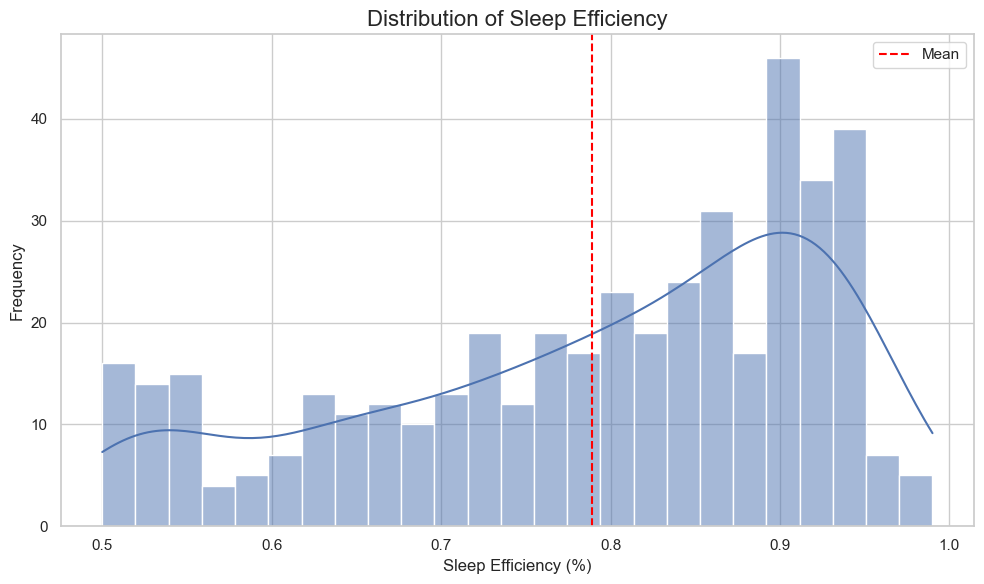

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sleep_efficiency'], bins=25, kde=True, color='#4C72B0')

plt.title("Distribution of Sleep Efficiency", fontsize=16)
plt.xlabel("Sleep Efficiency (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.axvline(df['sleep_efficiency'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.tight_layout()
plt.show()


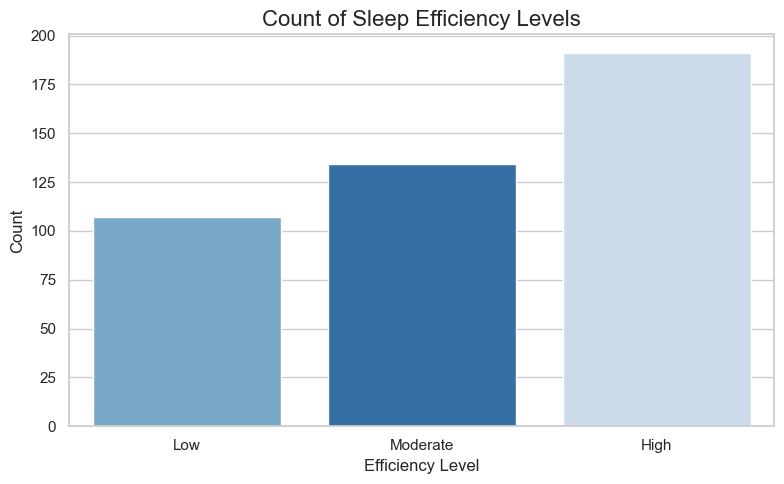

In [71]:
order = ['Low', 'Moderate', 'High']

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='efficiency_level',hue='efficiency_level', order=order, palette='Blues')

plt.title("Count of Sleep Efficiency Levels", fontsize=16)
plt.xlabel("Efficiency Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


<p align="center" style="color:#2E86C1; font-size:16px;">
<b>In general, more subjects in our dataset are experiencing efficient sleep, with a mean sleep efficiency of approximately 0.79.<br>
Let’s take a closer look and see how things vary across different <i>age groups</i>.</b>
</p>


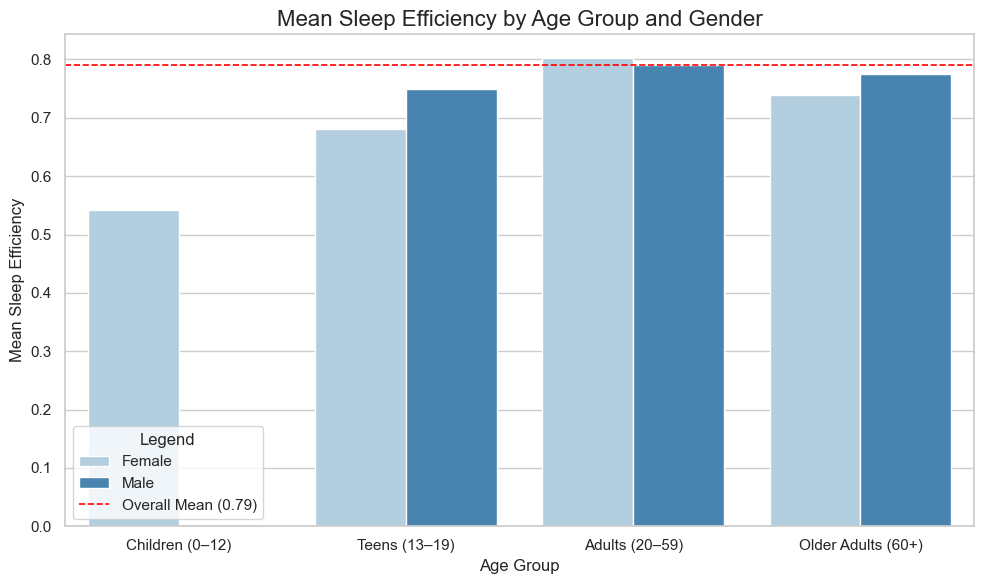

In [72]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(
    data=df,
    x='age_group',
    y='sleep_efficiency',
    hue='gender',
    errorbar=None,
    palette='Blues'
)

plt.title("Mean Sleep Efficiency by Age Group and Gender", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Mean Sleep Efficiency", fontsize=12)
plt.legend(title='Gender')

plt.axhline(0.79, color='red', linestyle='--', linewidth=1.2, label='Overall Mean (0.79)')
plt.legend(title='Legend', loc='lower left')


plt.tight_layout()
plt.show()


<p align="center" style="color:#2E86C1; font-size:16px;">
<b>
When looking at the mean sleep efficiency across <i>age groups</i> and <i>gender</i>, we see that only adults (ages 20–59) are achieving the overall mean of 0.79.<br>
This suggests that within each age group, sleep efficiency may be <i>left-skewed</i>, where a few individuals are driving the mean upward.<br>
Next, we’ll explore the <i>distribution of sleep efficiency</i> within each age group and gender to investigate this pattern further.
</b>
</p>


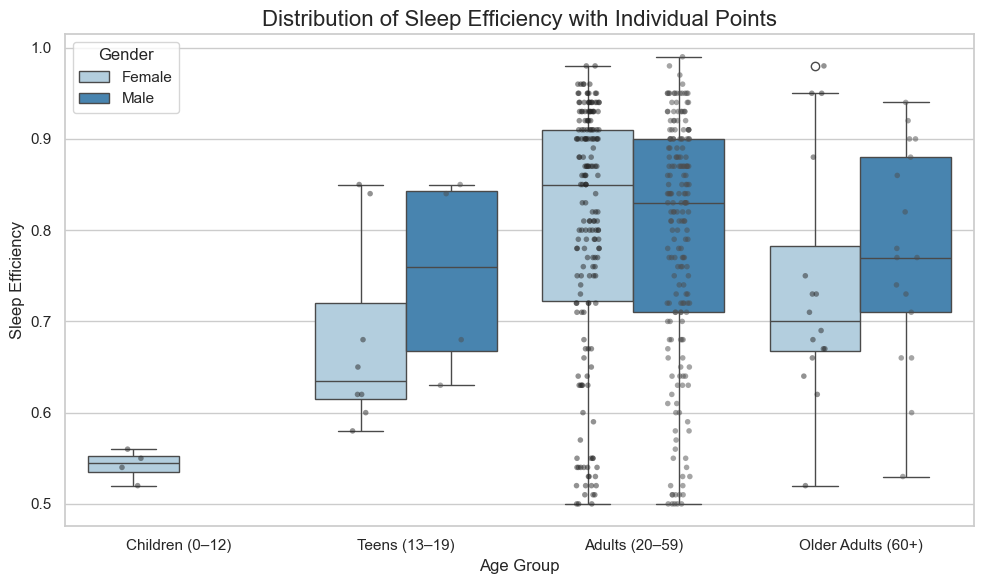

In [73]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Boxplot
sns.boxplot(
    data=df,
    x='age_group',
    y='sleep_efficiency',
    hue='gender',
    palette='Blues',
    dodge=True
)

# Overlay individual points
sns.stripplot(
    data=df,
    x='age_group',
    y='sleep_efficiency',
    hue='gender',
    palette='dark:.3',
    dodge=True,
    size=4,
    alpha=0.5
)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title='Gender', loc='upper left')

plt.title("Distribution of Sleep Efficiency with Individual Points", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Sleep Efficiency", fontsize=12)
plt.tight_layout()
plt.show()


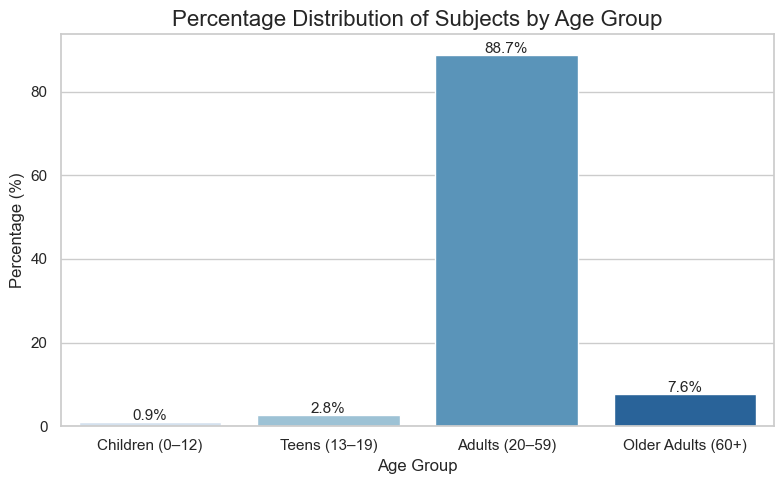

In [74]:
age_group_pct = (df['age_group'].value_counts(normalize=True) * 100).sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_pct.index, y=age_group_pct.values, palette='Blues')

plt.title("Percentage Distribution of Subjects by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.ylim(0, age_group_pct.values.max() + 5)

for i, val in enumerate(age_group_pct.values):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', fontsize=11)

plt.tight_layout()
plt.show()


<p align="center" style="color:#2E86C1; font-size:16px;">
<b>
It turns out the reason for the overall mean being closer to adults is that the <i>Adults (20–59)</i> group represents nearly <u>89%</u> of the dataset.<br>
Meanwhile, <i>Older Adults (60+)</i> make up only about <u>7.6%</u>, and the other age groups combined account for just <u>3.5%</u> — which is insufficient to draw conclusions with confidence.<br>
Therefore, going forward, we will primarily focus our analysis on the <i>Adults</i> group.
</b>

<p align="center" style="color:gray; font-size:13px;">
<i>Note: While insights on Teens and Older Adults are limited by sample size, key patterns will still be briefly highlighted where meaningful.</i>
</p>

</p>


In [75]:
# Filter the DataFrame for Adults
df_adults = df[df["age_group"] == "Adults (20–59)"]
df_adults.head(2)

,id,age,age_group,gender,date,bedtime_time,wakeup_time,sleep_duration,sleep_category,sleep_efficiency,efficiency_level,rem_sleep_percentage,rem_sleep_assessment,awakenings,awakening_level,caffeine_consumption,caffeine_level,alcohol_consumption,alcohol_level,smoking_status,exercise_frequency,exercise_level,day_type
2,3,40,Adults (20–59),Female,2021-05-25,21:30:00,05:30:00,8.0,7–9,0.89,High,20,Within Recommended,1.0,Typical,0.0,None,0.0,None,No,3.0,Some (1–3 sessions),Weekday
3,4,40,Adults (20–59),Female,2021-11-03,02:30:00,08:30:00,6.0,Below 7,0.51,Low,23,Within Recommended,3.0,Typical,50.0,Moderate,5.0,High,Yes,1.0,Some (1–3 sessions),Weekday


In [76]:
# Statistical summary
df_adults.describe()


,id,age,date,sleep_duration,sleep_efficiency,rem_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,exercise_frequency
count,383.000000,383.000000,383,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,227.467363,39.360313,2021-07-13 16:36:20.678851072,7.429504,0.796736,22.741514,1.597911,22.650131,1.122715,1.840731
min,3.000000,20.000000,2021-01-03 00:00:00,5.000000,0.500000,15.000000,0.000000,0.000000,0.000000,0.000000
25%,111.500000,29.000000,2021-04-17 00:00:00,7.000000,0.720000,20.000000,1.000000,0.000000,0.000000,1.000000
50%,230.000000,39.000000,2021-07-20 00:00:00,7.500000,0.830000,22.000000,1.000000,0.000000,0.000000,2.000000
75%,342.000000,50.000000,2021-10-11 12:00:00,8.000000,0.910000,25.500000,3.000000,50.000000,2.000000,3.000000
max,451.000000,59.000000,2021-12-31 00:00:00,10.000000,0.990000,30.000000,4.000000,200.000000,5.000000,5.000000
std,131.378668,11.112028,NaN,0.870693,0.134708,3.612591,1.359549,30.715086,1.627023,1.424620


In [77]:
# Categorical summaries
categorical_cols = [
    "gender", "smoking_status", "caffeine_level",
    "alcohol_level", "exercise_level", "efficiency_level",
    "sleep_category","rem_sleep_assessment", "day_type"
]

for col in categorical_cols:
    print(f"\n{col.upper()}:\n")
    print(df_adults[col].value_counts(normalize=True) * 100)



GENDER:

gender
Male      51.436031
Female    48.563969
Name: proportion, dtype: float64

SMOKING_STATUS:

smoking_status
No     64.490862
Yes    35.509138
Name: proportion, dtype: float64

CAFFEINE_LEVEL:

caffeine_level
None        51.958225
Moderate    28.720627
Low         18.015666
High         1.305483
Name: proportion, dtype: float64

ALCOHOL_LEVEL:

alcohol_level
None        58.746736
Low         19.060052
Moderate    15.143603
High         7.049608
Name: proportion, dtype: float64

EXERCISE_LEVEL:

exercise_level
Some (1–3 sessions)        63.968668
None (0 sessions)          24.020888
Frequent (4–5 sessions)    12.010444
Name: proportion, dtype: float64

EFFICIENCY_LEVEL:

efficiency_level
High        46.736292
Moderate    31.592689
Low         21.671018
Name: proportion, dtype: float64

SLEEP_CATEGORY:

sleep_category
7–9        87.206266
Below 7    10.966057
Above 9     1.827676
Name: proportion, dtype: float64

REM_SLEEP_ASSESSMENT:

rem_sleep_assessment
Within Recommende

<h2 align="center" style="color:#2471A3;">
Chapter 2: Zooming In — What Drives Sleep Efficiency Among Adults (20–59)?
</h2>


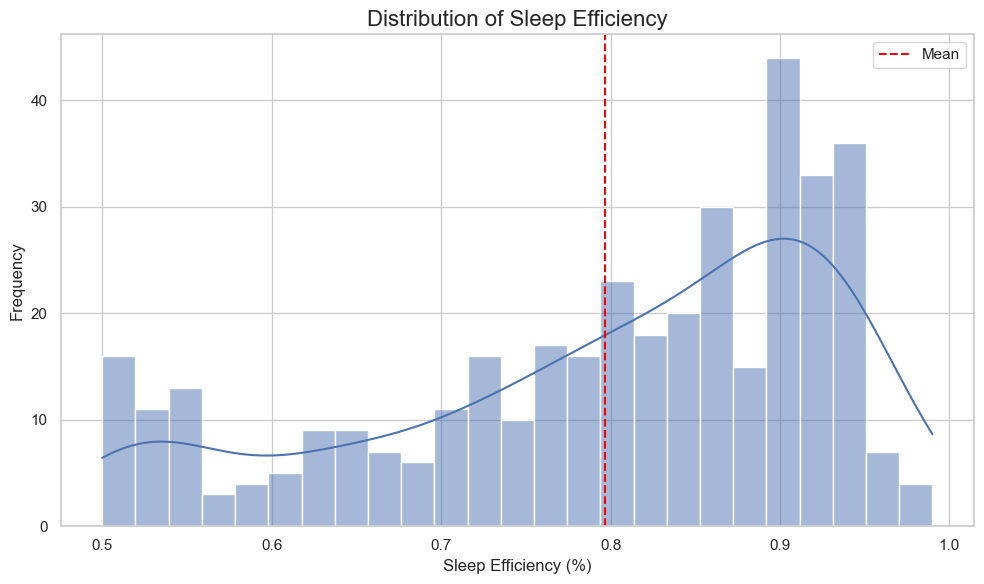

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(df_adults['sleep_efficiency'], bins=25, kde=True, color='#4C72B0')

plt.title("Distribution of Sleep Efficiency", fontsize=16)
plt.xlabel("Sleep Efficiency (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.axvline(df_adults['sleep_efficiency'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.tight_layout()
plt.show()


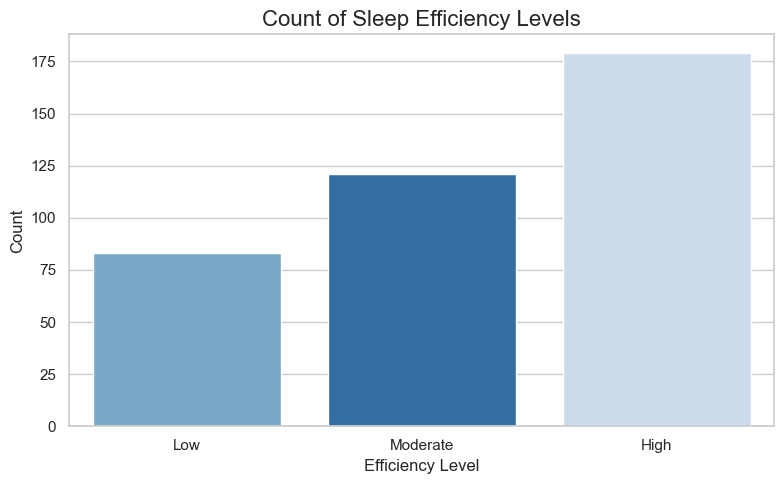

In [79]:
order = ['Low', 'Moderate', 'High']

plt.figure(figsize=(8, 5))
sns.countplot(data=df_adults, x='efficiency_level',hue='efficiency_level', order=order, palette='Blues')

plt.title("Count of Sleep Efficiency Levels", fontsize=16)
plt.xlabel("Efficiency Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


<p align="center" style="color:#2E86C1; font-size:16px;">
<b>The distribution of sleep efficiency within the Adult (20–59) group appears quite similar to the overall distribution presented earlier,<br>
which makes sense given that this group represents the majority of the dataset.<br>
To explore whether differences exist <i>within</i> this group, we now examine the <i>average age</i> across different <b>efficiency levels</b>.</b>
</p>


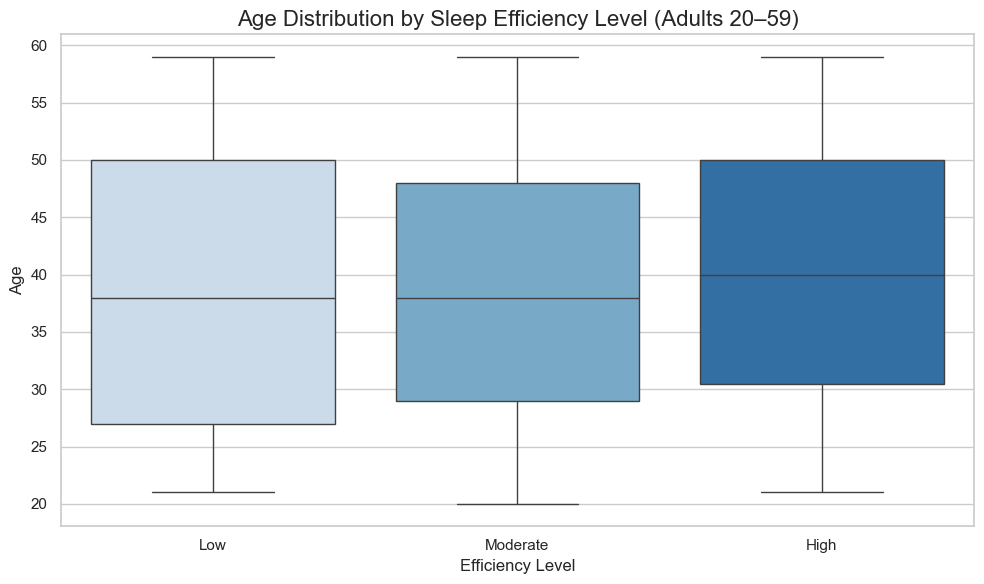

In [80]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_adults,
    x='efficiency_level',
    y='age',
    palette='Blues',
    order=['Low', 'Moderate', 'High']  # Custom order
)
plt.title("Age Distribution by Sleep Efficiency Level (Adults 20–59)", fontsize=16)
plt.xlabel("Efficiency Level", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.tight_layout()
plt.show()


<p align="center" style="color:#2E86C1; font-size:16px;">
<b>
There is no significant variance in the age distribution or mean across the sleep efficiency levels,<br>
which sets the stage for treating age as a controlled factor.<br>
Next, we examine whether <i>sleep duration</i> differs by efficiency level, considering gender differences.
</b>
</p>


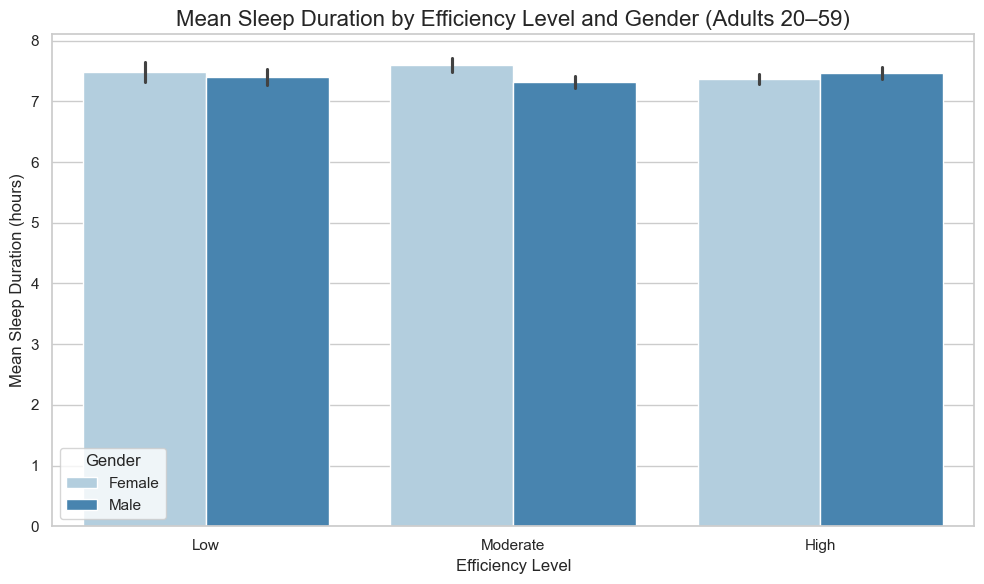

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_adults,
    x='efficiency_level',
    y='sleep_duration',
    hue='gender',
    palette='Blues',
    errorbar='se',
    order=['Low', 'Moderate', 'High']
)
plt.title("Mean Sleep Duration by Efficiency Level and Gender (Adults 20–59)", fontsize=16)
plt.xlabel("Efficiency Level", fontsize=12)
plt.ylabel("Mean Sleep Duration (hours)", fontsize=12)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


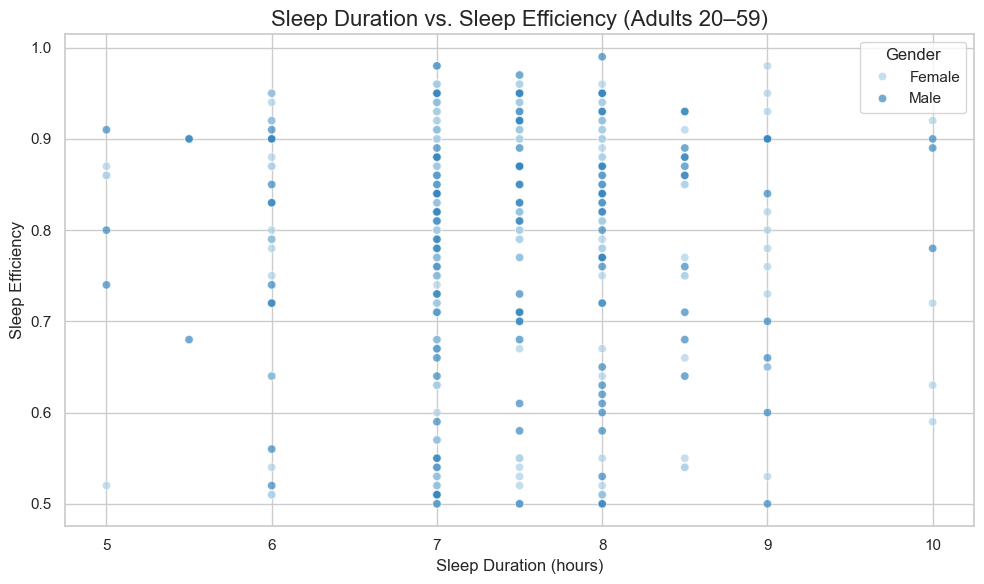

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_adults,
    x='sleep_duration',
    y='sleep_efficiency',
    hue='gender',
    palette='Blues',
    alpha=0.7
)
plt.title("Sleep Duration vs. Sleep Efficiency (Adults 20–59)", fontsize=16)
plt.xlabel("Sleep Duration (hours)", fontsize=12)
plt.ylabel("Sleep Efficiency", fontsize=12)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [83]:
df_adults.groupby('gender')['sleep_efficiency'].agg(['mean', 'count']).round(3).rename(
    columns={'mean': 'Avg Sleep Efficiency', 'count': 'Sample Size'}
)

,Avg Sleep Efficiency,Sample Size
gender,,
Female,0.803,186
Male,0.791,197


<p align="center" style="color:#2E86C1; font-size:16px;">
<b>When it comes to <i>sleep efficiency</i>, there is no significant difference between males and females.<br>
Both genders show similar average values—Females: 0.803, Males: 0.791—indicating that gender is unlikely to be a major factor in explaining variations in sleep efficiency among adults aged 20–59.</b>
</p>


<p align="center" style="color:#2E86C1; font-size:16px;">
<b>Next, we explore how <i>sleep efficiency</i> correlates with other behavioral and physiological factors in the dataset.<br>
This will help us identify which variables are most strongly associated with efficient sleep among adults aged 20–59.</b>
</p>


<h2 align="center" style="color:#2E86C1;">
Chapter 3: What Factors Influence Sleep Efficiency?
</h2>

exercise_frequency      0.226726
age                     0.095383
caffeine_consumption    0.087668
rem_sleep_percentage    0.028709
sleep_duration          0.001939
id                     -0.037544
alcohol_consumption    -0.435319
awakenings             -0.570649
Name: sleep_efficiency, dtype: float64

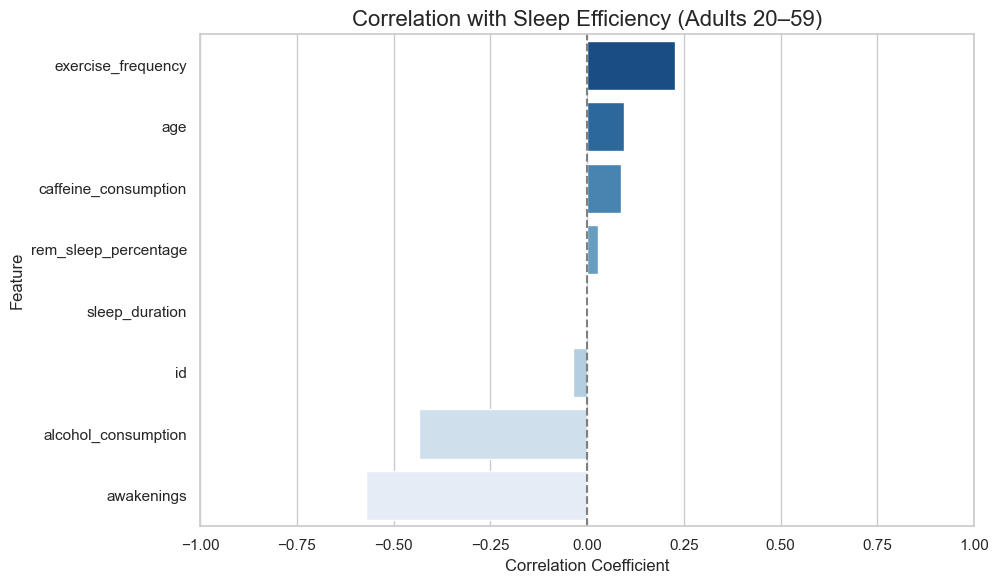

In [84]:
numeric_cols = df_adults.select_dtypes(include='number')

correlations = numeric_cols.corr()['sleep_efficiency'].sort_values(ascending=False)
correlations.drop('sleep_efficiency', inplace=True)
display(correlations)

plt.figure(figsize=(10, 6))
sns.barplot(
    y=correlations.index,
    x=correlations.values,
    palette='Blues_r'
)
plt.title('Correlation with Sleep Efficiency (Adults 20–59)', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(-1, 1) 

plt.show()


<p align="center" style="color:#2E86C1; font-size:16px;">
To better understand what might be influencing sleep efficiency among adults aged 20–59, we examined the correlation between sleep efficiency and other behavioral and demographic factors.<br><br>
The correlation scale ranges from <b>-1</b> (strong negative) to <b>+1</b> (strong positive). Here's what we found:
</p>

---

| Factor                  | Correlation with Sleep Efficiency |
|-------------------------|-----------------------------------|
| Awakenings              | <b>-0.57</b>                         |
| Alcohol Consumption     | <b>-0.43</b>                         |
| Exercise Frequency      | <b>+0.23</b>                         |
| Age                     | +0.095                            |
| Caffeine Consumption    | +0.088                            |
| REM Sleep Percentage    | +0.029                            |
| Sleep Duration          | ~0.002                            |
| ID (random)             | -0.038                            |

---

<p align="center" style="color:#2E86C1; font-size:16px;">
🔍 <b>Insights:</b><br>
- <b>Awakenings</b> show the strongest (negative) correlation with sleep efficiency, followed by <b>alcohol consumption</b>.<br>
- <b>Exercise frequency</b> has a weak-to-moderate positive impact on sleep efficiency.<br>
- Variables such as <b>age</b> and <b>caffeine consumption</b> show very weak positive associations.<br>
- Surprisingly, <b>sleep duration</b> has almost no correlation with efficiency, suggesting that <i>quality</i> of sleep may matter more than <i>length</i>.<br><br>

⚠️ <b>Note:</b> These are correlations, not causations. Additionally, since our dataset is primarily composed of adults (20–59), these findings are most reflective of that age group.
</p>


<p align="center" style="color:#2E86C1; font-size:16px;">
<b>
We will return to the most impactful factors shortly, but first, let’s investigate why <b>sleep duration</b> shows almost no effect on sleep efficiency.<br><br>
One assumption is that the <i>distribution of sleep duration</i> may not be wide enough to influence efficiency.<br>
To validate this, we examine the <i>sleep duration distribution</i> among adults aged 20–59.
</b>
</p>


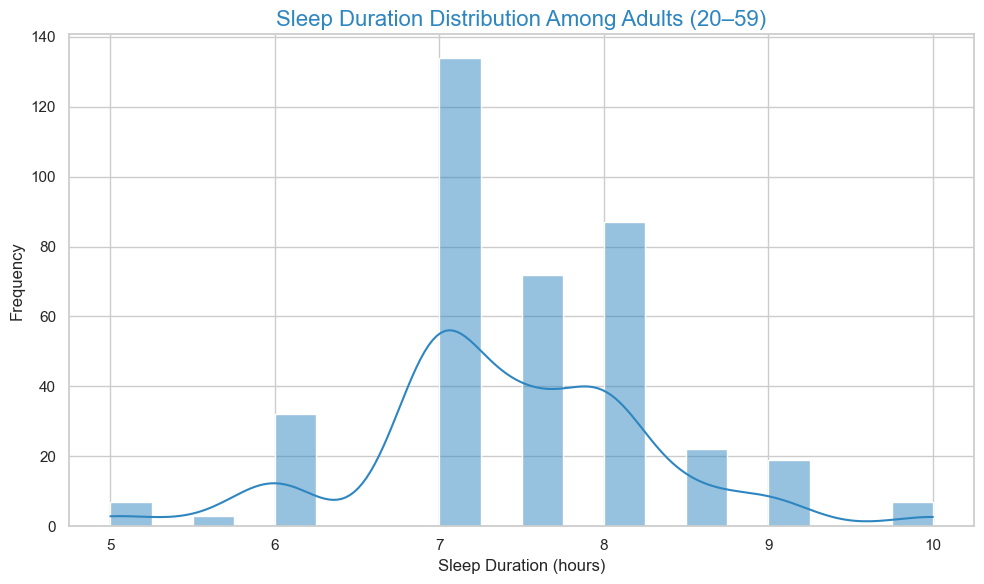

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(
    df_adults['sleep_duration'],
    bins=20,
    kde=True,
    color='#2E86C1'
)

plt.title("Sleep Duration Distribution Among Adults (20–59)", fontsize=16, color='#2E86C1')
plt.xlabel("Sleep Duration (hours)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()


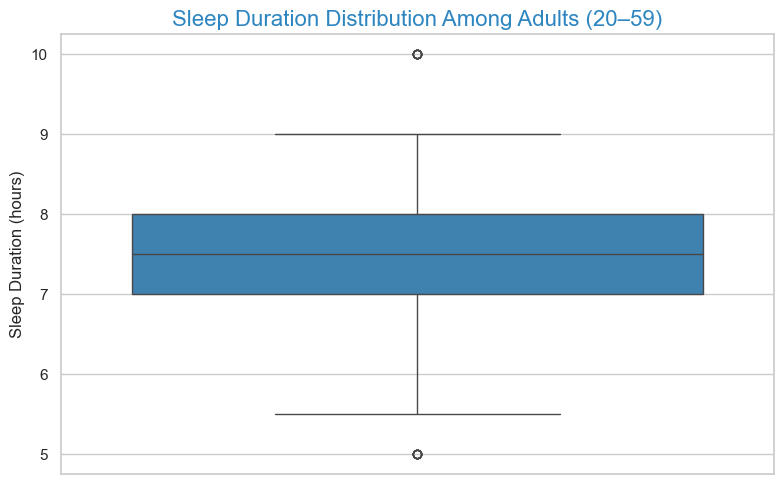

In [86]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_adults,
    y='sleep_duration',
    color='#2E86C1'
)

plt.title("Sleep Duration Distribution Among Adults (20–59)", fontsize=16, color='#2E86C1')
plt.ylabel("Sleep Duration (hours)", fontsize=12)
plt.tight_layout()
plt.show()


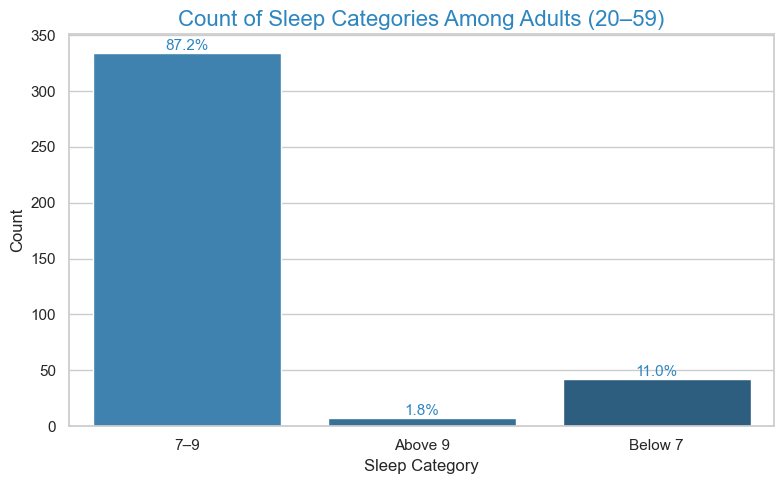

In [87]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df_adults,
    x='sleep_category',
    palette=['#2E86C1', '#2874A6', '#21618C']
)

total = len(df_adults)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom', fontsize=11, color='#2E86C1')

plt.title("Count of Sleep Categories Among Adults (20–59)", fontsize=16, color='#2E86C1')
plt.xlabel("Sleep Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


<p align="center" style="color:#2E86C1; font-size:16px;">
Upon exploring the sleep duration distribution, we find that approximately <b>87%</b> of observations slept between <b>7 and 9 hours</b>, with most clustered between <b>7 and 8 hours</b>.<br>
Only about <b>11%</b> slept less than 7 hours, and roughly <b>2%</b> slept more than 9 hours.<br><br>
This limited variability in sleep duration likely explains its low correlation with sleep efficiency.<br><br>
However, to confirm this hypothesis further, we will examine the correlation between sleep efficiency and other factors <b>within each sleep duration category separately</b>.
</p>


In [88]:
df.head()

,id,age,age_group,gender,date,bedtime_time,wakeup_time,sleep_duration,sleep_category,sleep_efficiency,efficiency_level,rem_sleep_percentage,rem_sleep_assessment,awakenings,awakening_level,caffeine_consumption,caffeine_level,alcohol_consumption,alcohol_level,smoking_status,exercise_frequency,exercise_level,day_type
0,1,65,Older Adults (60+),Female,2021-03-06,01:00:00,07:00:00,6.0,Below 7,0.88,High,18,Within Recommended,0.0,Better than average,0.0,None,0.0,None,Yes,3.0,Some (1–3 sessions),Weekend
1,2,69,Older Adults (60+),Male,2021-12-05,02:00:00,09:00:00,7.0,7–9,0.66,Low,19,Within Recommended,3.0,Typical,0.0,None,3.0,Moderate,Yes,3.0,Some (1–3 sessions),Weekend
2,3,40,Adults (20–59),Female,2021-05-25,21:30:00,05:30:00,8.0,7–9,0.89,High,20,Within Recommended,1.0,Typical,0.0,None,0.0,None,No,3.0,Some (1–3 sessions),Weekday
3,4,40,Adults (20–59),Female,2021-11-03,02:30:00,08:30:00,6.0,Below 7,0.51,Low,23,Within Recommended,3.0,Typical,50.0,Moderate,5.0,High,Yes,1.0,Some (1–3 sessions),Weekday
4,5,57,Adults (20–59),Male,2021-03-13,01:00:00,09:00:00,8.0,7–9,0.76,Moderate,27,Above Recommended,3.0,Typical,0.0,None,3.0,Moderate,No,3.0,Some (1–3 sessions),Weekend


In [89]:
# Group by sleep_category and calculate correlations within each group
for category, group in df_adults.groupby('sleep_category'):
    print(f"\nCorrelation with sleep efficiency for sleep category: {category}")
    corr = group.select_dtypes(include='number').corr()['sleep_efficiency'].drop('sleep_efficiency').sort_values(ascending=False)
    display(corr)



Correlation with sleep efficiency for sleep category: 7–9


exercise_frequency      0.222724
caffeine_consumption    0.097757
age                     0.078491
rem_sleep_percentage    0.029425
sleep_duration         -0.015694
id                     -0.073679
alcohol_consumption    -0.417877
awakenings             -0.567482
Name: sleep_efficiency, dtype: float64


Correlation with sleep efficiency for sleep category: Above 9


exercise_frequency      0.471039
age                     0.440365
id                      0.177519
rem_sleep_percentage   -0.108471
alcohol_consumption    -0.190184
caffeine_consumption   -0.325191
awakenings             -0.828529
sleep_duration               NaN
Name: sleep_efficiency, dtype: float64


Correlation with sleep efficiency for sleep category: Below 7


age                     0.226961
exercise_frequency      0.206424
id                      0.199481
rem_sleep_percentage    0.074492
caffeine_consumption    0.053377
sleep_duration         -0.066479
awakenings             -0.560778
alcohol_consumption    -0.589488
Name: sleep_efficiency, dtype: float64

<h2 align="center" style="color:#2E86C1;">Sleep Efficiency Correlations by Sleep Duration Category</h2>

<p align="center" style="color:#2E86C1; font-size:16px;">
To deepen our understanding, we analyzed correlations between <b>sleep efficiency</b> and other factors <b>within each sleep duration category</b>. This helps reveal if relationships differ depending on how long people sleep.
</p>

<table align="center" style="border-collapse: collapse; width: 80%; font-size:14px; color:#2E86C1;">
<thead>
<tr style="border-bottom: 2px solid #2E86C1;">
<th style="text-align:left; padding:8px;">Factor</th>
<th style="text-align:center; padding:8px;">Below 7 Hours</th>
<th style="text-align:center; padding:8px;">7–9 Hours</th>
<th style="text-align:center; padding:8px;">Above 9 Hours</th>
</tr>
</thead>
<tbody>
<tr><td style="padding:6px;">Exercise Frequency</td><td style="text-align:center;">0.206</td><td style="text-align:center;">0.223</td><td style="text-align:center;">0.471</td></tr>
<tr><td style="padding:6px;">Age</td><td style="text-align:center;">0.227</td><td style="text-align:center;">0.078</td><td style="text-align:center;">0.440</td></tr>
<tr><td style="padding:6px;">Alcohol Consumption</td><td style="text-align:center;">-0.589</td><td style="text-align:center;">-0.418</td><td style="text-align:center;">-0.190</td></tr>
<tr><td style="padding:6px;">Awakenings</td><td style="text-align:center;">-0.561</td><td style="text-align:center;">-0.567</td><td style="text-align:center;">-0.829</td></tr>
<tr><td style="padding:6px;">Caffeine Consumption</td><td style="text-align:center;">0.053</td><td style="text-align:center;">0.098</td><td style="text-align:center;">-0.325</td></tr>
<tr><td style="padding:6px;">REM Sleep Percentage</td><td style="text-align:center;">0.074</td><td style="text-align:center;">0.029</td><td style="text-align:center;">-0.108</td></tr>
<tr><td style="padding:6px;">Sleep Duration</td><td style="text-align:center;">-0.066</td><td style="text-align:center;">-0.016</td><td style="text-align:center;">N/A</td></tr>
</tbody>
</table>

<p align="center" style="color:#2E86C1; font-size:16px; margin-top:20px;">
<b>Key observations:</b><br>
- <b>Awakenings</strong> maintain a strong negative correlation with sleep efficiency across all sleep duration categories.<br>
- <b>Alcohol consumption</b> also consistently shows a moderate to strong negative correlation.<br>
- <b>Exercise frequency</b> has a notably higher positive correlation in the <i>Above 9 hours</i> category.<br>
- <b>Age</b> shows higher positive correlation in the <i>Below 7</i> and <i>Above 9 hours</i> groups.<br>
- Correlations with <b>caffeine consumption</b> vary, turning negative in the <i>Above 9 hours</i> group.<br><br>
This suggests that the influence of these factors on sleep efficiency can vary depending on how long people sleep.
</p>


<p align="center" style="color:#2E86C1; font-size:16px; margin-top:20px;">
<b>Important consideration regarding the "Sleep Duration" correlation in the "Above 9 Hours" category:</b><br>
The correlation is marked as <b>N/A</b> because sleep duration within this group shows very limited variabilirs.<br>
Since correlation requires variation in both variables to produce meaningful results, this limited range means the correlation here cannot be reliably estimated.<b
</p>
</p>


<p align="center" style="color:#2E86C1; font-size:16px; max-width:700px; margin:auto;"> <b>To validate whether the correlations between sleep efficiency and various behavioral and demographic factors differ significantly across sleep duration categories, we will apply Fisher’s Z-test. This statistical test helps determine if observed differences in correlation coefficients between groups are meaningful or likely due to chance.</b> </p>

In [90]:
def fisher_z(r):
    return 0.5 * np.log((1 + r) / (1 - r))

def compare_correlations(r1, n1, r2, n2):
    # Handle cases where r is exactly 1 or -1, which cause infinite z
    if abs(r1) == 1 or abs(r2) == 1:
        return np.nan, np.nan
    z1 = fisher_z(r1)
    z2 = fisher_z(r2)
    se = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
    z = (z1 - z2) / se
    p = 2 * (1 - norm.cdf(abs(z)))
    return z, p

predictors = ['exercise_frequency', 'caffeine_consumption', 'alcohol_consumption', 
              'awakenings', 'age', 'rem_sleep_percentage', 'sleep_duration']

sleep_categories = df_adults['sleep_category'].unique()

results = []

for var in predictors:
    for i, cat1 in enumerate(sleep_categories):
        for cat2 in sleep_categories[i+1:]:
            group1 = df_adults[df_adults['sleep_category'] == cat1]
            group2 = df_adults[df_adults['sleep_category'] == cat2]
            r1 = group1[var].corr(group1['sleep_efficiency'])
            n1 = len(group1)
            r2 = group2[var].corr(group2['sleep_efficiency'])
            n2 = len(group2)
            z_stat, p_val = compare_correlations(r1, n1, r2, n2)
            results.append({
                'Variable': var,
                'Group 1': cat1,
                'Group 2': cat2,
                'Correlation 1': r1,
                'Sample Size 1': n1,
                'Correlation 2': r2,
                'Sample Size 2': n2,
                'Z Statistic': z_stat,
                'p-value': p_val
            })

pairwise_df = pd.DataFrame(results)

# Sort by p-value to find the most significant differences easily
pairwise_df = pairwise_df.sort_values('p-value').reset_index(drop=True)

pairwise_df


,Variable,Group 1,Group 2,Correlation 1,Sample Size 1,Correlation 2,Sample Size 2,Z Statistic,p-value
0,alcohol_consumption,7–9,Below 7,-0.417877,334,-0.589488,42,1.368957,0.171013
1,awakenings,7–9,Above 9,-0.567482,334,-0.828529,7,1.072791,0.283365
2,awakenings,Below 7,Above 9,-0.560778,42,-0.828529,7,1.046562,0.295302
3,alcohol_consumption,Below 7,Above 9,-0.589488,42,-0.190184,7,-0.922550,0.356242
4,age,7–9,Below 7,0.078491,334,0.226961,42,-0.899768,0.368244
5,caffeine_consumption,7–9,Above 9,0.097757,334,-0.325191,7,0.865809,0.386595
6,age,7–9,Above 9,0.078491,334,0.440365,7,-0.783343,0.433426
7,caffeine_consumption,Below 7,Above 9,0.053377,42,-0.325191,7,0.744492,0.456579
8,exercise_frequency,Below 7,Above 9,0.206424,42,0.471039,7,-0.575167,0.565179
9,exercise_frequency,7–9,Above 9,0.222724,334,0.471039,7,-0.566357,0.571151


<p align="center" style="color:#2E86C1; font-size:16px; max-width:700px; margin:auto;"> <b>Pairwise correlation comparisons across sleep duration categories showed no statistically significant differences (all p-values &gt; 0.05) for the factors studied. This indicates that the relationships between sleep efficiency and variables such as awakenings, alcohol consumption, exercise frequency, age, and caffeine consumption are generally consistent across different sleep duration groups.</b><br><br> Note that some groups, especially the “Above 9” hours category, have small sample sizes, which limits the power to detect differences and calls for cautious interpretation.<br><br> Overall, these findings suggest a stable pattern of associations between sleep efficiency and the examined factors regardless of sleep duration category in this dataset. </p>

<p align="center" style="color:#2E86C1; font-size:16px;">
Having analyzed the key predictors of sleep efficiency in adults, we now shift our focus to explore <b>behavioral patterns during weekdays versus weekends</b>.<br>
This includes examining variations in sleep efficiency, sleep duration, exercise frequency, caffeine and alcohol consumption, as well as awakenings across different day types.<br><br>
Understanding these patterns will help us uncover lifestyle influences on sleep and provide valuable context before revisiting the main sleep efficiency analysis.<br><br>
Our next step will be to conduct comparative analysis and visualizations to highlight any significant differences between <b>weekdays and weekends</b>.
</p>


<h2 align="center" style="color:#2E86C1;">
Chapter 4: How Do Weekday and Weekend Patterns Affect Sleep?
</h2>

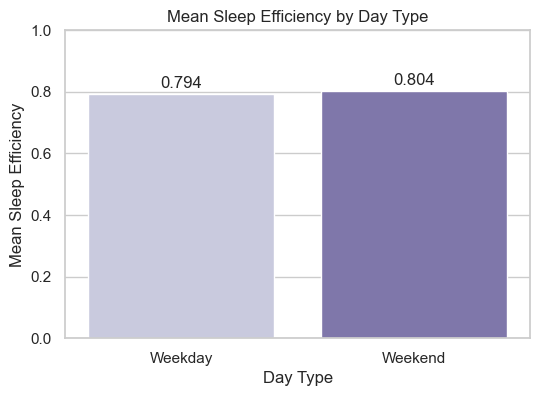

In [91]:

mean_efficiency = df_adults.groupby('day_type')['sleep_efficiency'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=mean_efficiency.index, y=mean_efficiency.values, palette='Purples')

plt.title('Mean Sleep Efficiency by Day Type')
plt.ylabel('Mean Sleep Efficiency')
plt.ylim(0, 1)  # Sleep efficiency is between 0 and 1
plt.xlabel('Day Type')

# Annotate bars with values
for i, v in enumerate(mean_efficiency.values):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')

plt.show()


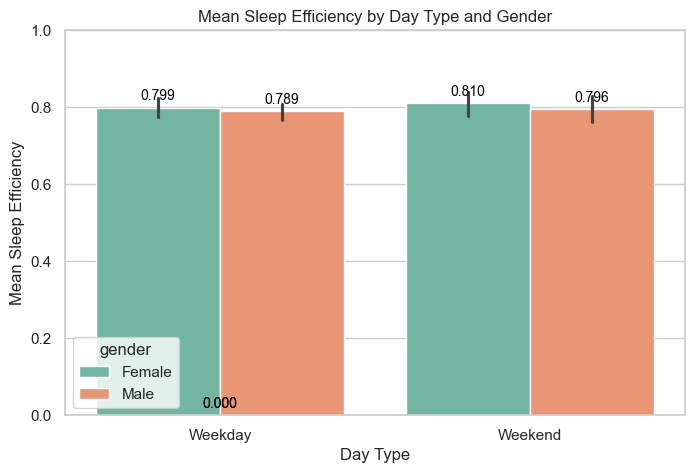

In [92]:
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=df_adults,
    x='day_type',
    y='sleep_efficiency',
    hue='gender',
    palette='Set2'
)
plt.title('Mean Sleep Efficiency by Day Type and Gender')
plt.ylim(0, 1)
plt.ylabel('Mean Sleep Efficiency')
plt.xlabel('Day Type')

# Annotate bar values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()


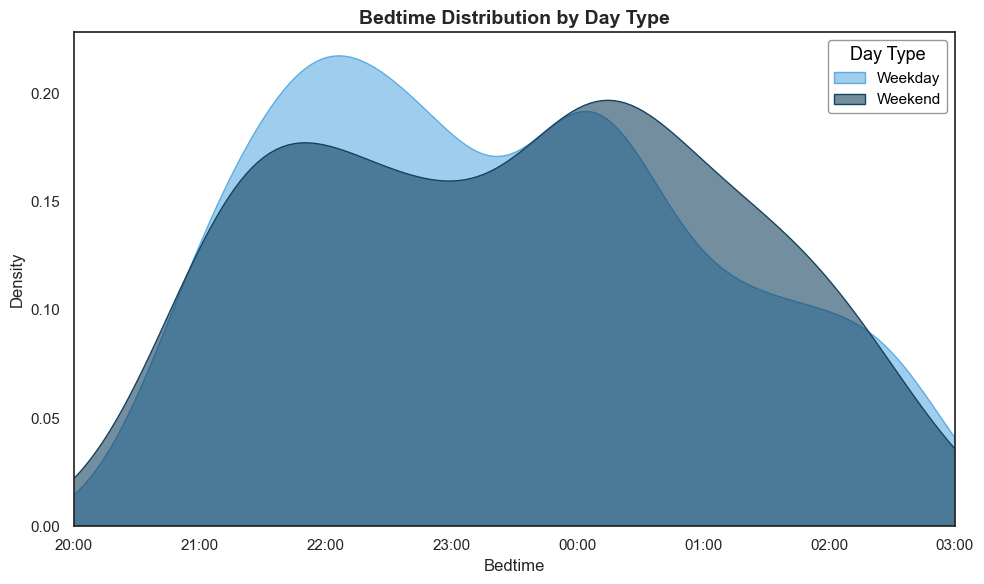

In [93]:
# Convert bedtime_time (datetime.time) to numeric hour
def time_to_float(t):
    return t.hour + t.minute / 60 if pd.notnull(t) else np.nan

# Apply conversion
df_adults['bedtime_hour'] = df_adults['bedtime_time'].apply(time_to_float)

# Shift bedtime so that hours after midnight (00:00–03:00) are treated as continuation of night
def shift_bedtime(hour):
    if pd.isnull(hour):
        return np.nan
    return hour + 24 if hour < 18 else hour  # Shift any hour < 18, especially 0–3 AM

df_adults['bedtime_shifted'] = df_adults['bedtime_hour'].apply(shift_bedtime)

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

plt.figure(figsize=(10, 6))

for label, color in zip(['Weekday', 'Weekend'], ['#5DADE2', '#154360']):
    sns.kdeplot(
        data=df_adults[df_adults['day_type'] == label],
        x='bedtime_shifted',
        fill=True,
        label=label,
        color=color,
        alpha=0.6
    )

plt.title('Bedtime Distribution by Day Type', fontsize=14, weight='bold')
plt.xlabel('Bedtime', fontsize=12)
plt.ylabel('Density')

plt.xticks(
    [20, 21, 22, 23, 24, 25, 26, 27],
    ['20:00', '21:00', '22:00', '23:00', '00:00', '01:00', '02:00', '03:00']
)
plt.xlim(20, 27)

# Legend styling fix
legend = plt.legend(title='Day Type', title_fontsize='13', fontsize='11', loc='upper right', frameon=True)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('gray')
for text in legend.get_texts():
    text.set_color('black')
legend.get_title().set_color('black')

plt.tight_layout()
plt.show()


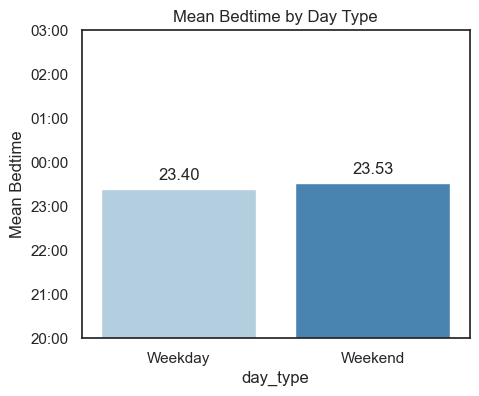

In [94]:
means = df_adults.groupby('day_type')['bedtime_shifted'].mean()

plt.figure(figsize=(5,4))
sns.barplot(x=means.index, y=means.values, palette='Blues')
plt.title('Mean Bedtime by Day Type')
plt.ylabel('Mean Bedtime')
plt.ylim(20, 27)
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.yticks(
    ticks=[20,21,22,23,24,25,26,27],
    labels=['20:00','21:00','22:00','23:00','00:00','01:00','02:00','03:00']
)

for i, v in enumerate(means.values):
    plt.text(i, v + 0.2, f'{v:.2f}', ha='center')

plt.show()


In [95]:

week_bed = df_adults[df_adults['day_type'] == 'Weekday']['bedtime_shifted']
weekend_bed = df_adults[df_adults['day_type'] == 'Weekend']['bedtime_shifted']

t_stat, p_val = ttest_ind(week_bed, weekend_bed)
print(f"T-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")


T-statistic = -0.70, p-value = 0.4833


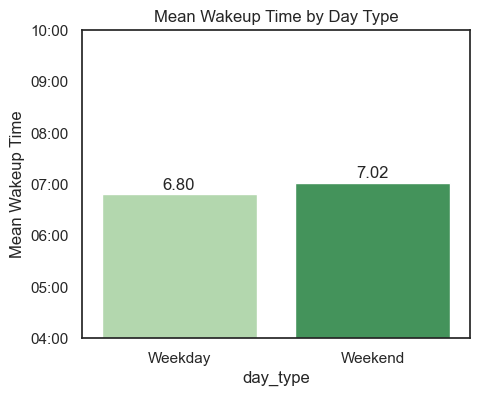

In [96]:
# Convert wakeup_time (datetime.time) to decimal hour
def time_to_decimal(t):
    return t.hour + t.minute / 60 if pd.notnull(t) else np.nan

df_adults['wakeup_decimal'] = df_adults['wakeup_time'].apply(time_to_decimal)

# Calculate means by day_type
means_wakeup = df_adults.groupby('day_type')['wakeup_decimal'].mean()

# Plot mean wakeup times
plt.figure(figsize=(5,4))
sns.barplot(x=means_wakeup.index, y=means_wakeup.values, palette='Greens')
plt.title('Mean Wakeup Time by Day Type')
plt.ylabel('Mean Wakeup Time')
plt.ylim(4, 10)  # Typical wakeup range
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.yticks(
    ticks=range(4, 11),
    labels=['04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00']
)

# Annotate bars with values
for i, v in enumerate(means_wakeup.values):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center')

plt.show()


In [97]:
week_wake = df_adults[df_adults['day_type'] == 'Weekday']['wakeup_decimal']
weekend_wake = df_adults[df_adults['day_type'] == 'Weekend']['wakeup_decimal']

t_stat_wake, p_val_wake = ttest_ind(week_wake, weekend_wake, nan_policy='omit')
print(f"Wakeup Time - T-statistic = {t_stat_wake:.2f}, p-value = {p_val_wake:.4f}")


Wakeup Time - T-statistic = -1.04, p-value = 0.2983


<p align="center" style="color:#2E86C1; font-size:16px;">
We conducted statistical tests to compare <b>bedtime</b> and <b>wakeup time</b> between <b>weekdays</b> and <b>weekends</b>.<br><br>
- For bedtime, the t-test yielded a <b>t-statistic of -0.70</b> and a <b>p-value of 0.4833</b>.<br>
- For wakeup time, the t-test yielded a <b>t-statistic of -1.04</b> and a <b>p-value of 0.2983</b>.<br><br>
Since both p-values are above the standard significance level of 0.05, we conclude that there is <b>no statistically significant difference</b> in average bedtimes or wakeup times between weekdays and weekends in this dataset.<br><br>
This suggests that individuals tend to maintain relatively consistent sleep schedules throughout the week.
</p>


In [98]:
week_eff = df_adults[df_adults['day_type'] == 'Weekday']['sleep_efficiency']
weekend_eff = df_adults[df_adults['day_type'] == 'Weekend']['sleep_efficiency']

t_stat_eff, p_val_eff = ttest_ind(week_eff, weekend_eff, nan_policy='omit')
print(f"Sleep Efficiency - T-statistic = {t_stat_eff:.2f}, p-value = {p_val_eff:.4f}")


Sleep Efficiency - T-statistic = -0.65, p-value = 0.5131


<p align="center" style="color:#2E86C1; font-size:16px;">
To examine whether <b>sleep efficiency</b> differs between <b>weekdays</b> and <b>weekends</b>, we conducted an independent t-test.<br><br>
The test yielded a <b>t-statistic of -0.65</b> and a <b>p-value of 0.5131</b>.<br><br>
Since the p-value is well above 0.05, we conclude that there is <b>no statistically significant difference</b> in sleep efficiency between the two day types.<br><br>
This supports the observation that individuals maintain <b>consistent sleep quality</b> throughout the week.
</p>


<p align="center" style="color:#2E86C1; font-size:16px;">
Before concluding the analysis of <b>day type</b>, we will specifically examine adults under 30 years old to determine whether they exhibit<br>
any special correlation patterns or significant shifts in bedtime during weekends compared to weekdays.<br><br>
This targeted check helps ensure that age-related behavioral differences do not mask important insights in the overall analysis.
</p>


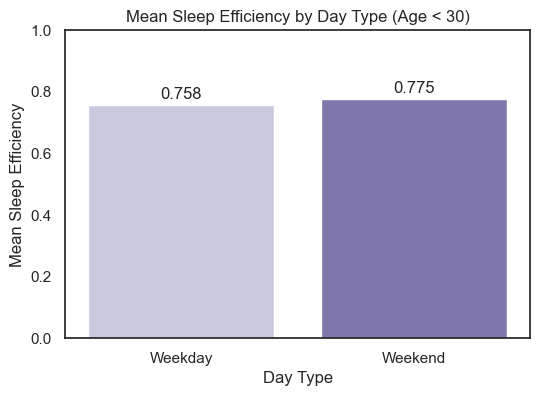

In [99]:
df_under_30 = df_adults[df_adults['age'] < 30]

mean_efficiency_under_30 = df_under_30.groupby('day_type')['sleep_efficiency'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=mean_efficiency_under_30.index, y=mean_efficiency_under_30.values, palette='Purples')

plt.title('Mean Sleep Efficiency by Day Type (Age < 30)')
plt.ylabel('Mean Sleep Efficiency')
plt.ylim(0, 1)
plt.xlabel('Day Type')

# Annotate bars with values
for i, v in enumerate(mean_efficiency_under_30.values):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')

plt.show()


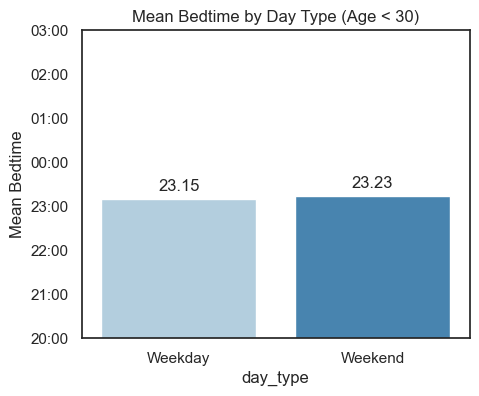

In [100]:
df_under_30 = df_adults[df_adults['age'] < 30]

means_under_30 = df_under_30.groupby('day_type')['bedtime_shifted'].mean()

plt.figure(figsize=(5,4))
sns.barplot(x=means_under_30.index, y=means_under_30.values, palette='Blues')

plt.title('Mean Bedtime by Day Type (Age < 30)')
plt.ylabel('Mean Bedtime')
plt.ylim(20, 27)
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.yticks(
    ticks=[20,21,22,23,24,25,26,27],
    labels=['20:00','21:00','22:00','23:00','00:00','01:00','02:00','03:00']
)

for i, v in enumerate(means_under_30.values):
    plt.text(i, v + 0.2, f'{v:.2f}', ha='center')

plt.show()


<p align="center" style="color:#2E86C1; font-size:16px;">
The analysis focused on adults under 30 revealed that the bedtime and sleep efficiency patterns are consistent with the overall adult population.<br><br>
There is no significant shift in bedtime or change in sleep efficiency between weekdays and weekends for this age group.<br><br>
Therefore, within this dataset, <b>day type does not appear to be a significant factor influencing sleep patterns or sleep efficiency</b>, both generally and for younger adults specifically.
</p>


<h2 align="center" style="color:#2E86C1;">
Chapter 5: Exploring Monthly Patterns in Sleep Efficiency
</h2>


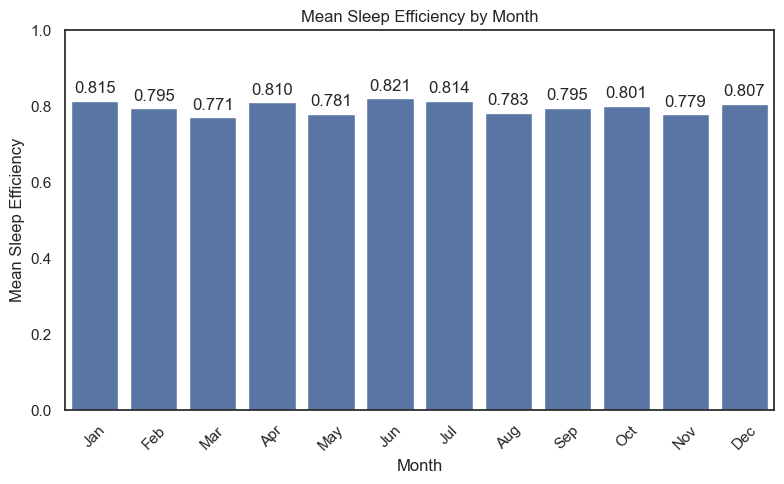

In [101]:
df_adults['month'] = df_adults['date'].dt.month


mean_eff_by_month = df_adults.groupby('month')['sleep_efficiency'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=mean_eff_by_month.index, y=mean_eff_by_month.values)
plt.title('Mean Sleep Efficiency by Month')
plt.xlabel('Month')
plt.ylabel('Mean Sleep Efficiency')
plt.ylim(0, 1)
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)

# Annotate bars
for i, v in enumerate(mean_eff_by_month.values):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.show()


In [102]:
month_counts = df_adults['month'].value_counts().sort_index()

month_percent = (month_counts / month_counts.sum()) * 100

import pandas as pd

month_summary = pd.DataFrame({
    'Count': month_counts,
    'Percentage': month_percent.round(2)
})

month_summary


,Count,Percentage
month,,
1,20,5.22
2,30,7.83
3,34,8.88
4,28,7.31
5,30,7.83
6,27,7.05
7,38,9.92
8,31,8.09
9,37,9.66


<p align="center" style="color:#2E86C1; font-size:16px;">
The distribution of data across months is fairly even, with no outstanding patterns observed in sleep efficiency.<br><br>
</p>


In [103]:
df_adults

,id,age,age_group,gender,date,bedtime_time,wakeup_time,sleep_duration,sleep_category,sleep_efficiency,efficiency_level,rem_sleep_percentage,rem_sleep_assessment,awakenings,awakening_level,caffeine_consumption,caffeine_level,alcohol_consumption,alcohol_level,smoking_status,exercise_frequency,exercise_level,day_type,bedtime_hour,bedtime_shifted,wakeup_decimal,month
2,3,40,Adults (20–59),Female,2021-05-25,21:30:00,05:30:00,8.0,7–9,0.89,High,20,Within Recommended,1.0,Typical,0.0,None,0.0,None,No,3.0,Some (1–3 sessions),Weekday,21.5,21.5,5.5,5
3,4,40,Adults (20–59),Female,2021-11-03,02:30:00,08:30:00,6.0,Below 7,0.51,Low,23,Within Recommended,3.0,Typical,50.0,Moderate,5.0,High,Yes,1.0,Some (1–3 sessions),Weekday,2.5,26.5,8.5,11
4,5,57,Adults (20–59),Male,2021-03-13,01:00:00,09:00:00,8.0,7–9,0.76,Moderate,27,Above Recommended,3.0,Typical,0.0,None,3.0,Moderate,No,3.0,Some (1–3 sessions),Weekend,1.0,25.0,9.0,3
5,6,36,Adults (20–59),Female,2021-07-01,21:00:00,04:30:00,7.5,7–9,0.90,High,23,Within Recommended,0.0,Better than average,0.0,None,0.0,None,No,1.0,Some (1–3 sessions),Weekday,21.0,21.0,4.5,7
6,7,27,Adults (20–59),Female,2021-07-21,21:00:00,03:00:00,6.0,Below 7,0.54,Low,28,Above Recommended,2.0,Typical,50.0,Moderate,0.0,None,Yes,1.0,Some (1–3 sessions),Weekday,21.0,21.0,3.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,447,23,Adults (20–59),Male,2021-04-21,00:00:00,07:00:00,7.0,7–9,0.50,Low,15,Below Recommended,2.0,Typical,0.0,None,4.0,Moderate,Yes,0.0,None (0 sessions),Weekday,0.0,24.0,7.0,4
427,448,27,Adults (20–59),Female,2021-11-13,22:00:00,05:30:00,7.5,7–9,0.91,High,22,Within Recommended,0.0,Better than average,0.0,None,0.0,None,No,5.0,Frequent (4–5 sessions),Weekend,22.0,22.0,5.5,11
428,449,52,Adults (20–59),Male,2021-03-31,21:00:00,03:00:00,6.0,Below 7,0.74,Moderate,28,Above Recommended,4.0,Outside typical range,25.0,Low,0.0,None,No,3.0,Some (1–3 sessions),Weekday,21.0,21.0,3.0,3
429,450,40,Adults (20–59),Female,2021-09-07,23:00:00,07:30:00,8.5,7–9,0.55,Low,20,Within Recommended,1.0,Typical,0.0,None,3.0,Moderate,Yes,0.0,None (0 sessions),Weekday,23.0,23.0,7.5,9


<h2 align="center" style="color:#2E86C1;">Chapter 6: Statistical Modeling and Hypothesis Testing</h2>



exercise_frequency      0.226726
age                     0.095383
caffeine_consumption    0.087668
bedtime_hour            0.083912
rem_sleep_percentage    0.028709
sleep_duration          0.001939
month                  -0.001091
id                     -0.037544
wakeup_decimal         -0.069441
bedtime_shifted        -0.081427
alcohol_consumption    -0.435319
awakenings             -0.570649
Name: sleep_efficiency, dtype: float64

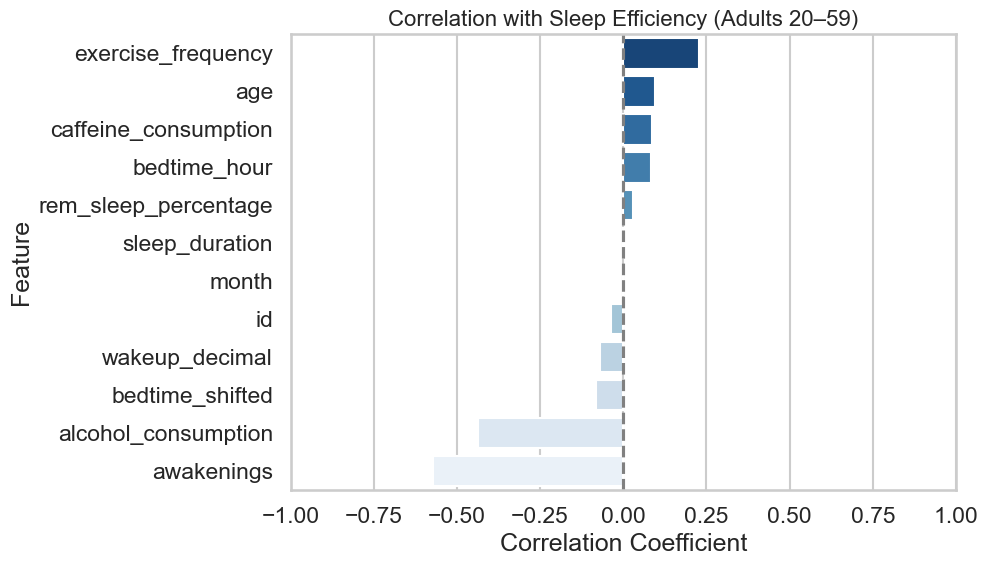

In [122]:
numeric_cols = df_adults.select_dtypes(include='number')

correlations = numeric_cols.corr()['sleep_efficiency'].sort_values(ascending=False)
correlations.drop('sleep_efficiency', inplace=True)
display(correlations)

plt.figure(figsize=(10, 6))
sns.barplot(
    y=correlations.index,
    x=correlations.values,
    palette='Blues_r'
)
plt.title('Correlation with Sleep Efficiency (Adults 20–59)', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(-1, 1) 

plt.show()


In [126]:
# Define columns to use
columns_to_use = [
    'sleep_efficiency', 'caffeine_level', 'alcohol_level',
    'smoking_status', 'exercise_level', 'sleep_duration'
]

# Filter adults dataset and drop rows with missing values in these columns
df_clean = df_adults[columns_to_use].dropna()

# Encode categorical variables
df_clean['smoking_status'] = df_clean['smoking_status'].map({'No': 0, 'Yes': 1})
df_clean['caffeine_binary'] = df_clean['caffeine_level'].apply(lambda x: 0 if x == 'None' else 1)
df_clean['alcohol_binary'] = df_clean['alcohol_level'].apply(lambda x: 0 if x == 'None' else 1)

exercise_map = {
    'None (0 sessions)': 0,
    'Some (1–3 sessions)': 1,
    'Frequent (4–5 sessions)': 2
}
df_clean['exercise_score'] = df_clean['exercise_level'].map(exercise_map)


In [127]:
# Define regression inputs
X = df_clean[['caffeine_binary', 'alcohol_binary', 'smoking_status', 'exercise_score', 'sleep_duration']]
X = sm.add_constant(X)
y = df_clean['sleep_efficiency']

In [128]:
# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       sleep_efficiency   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     31.77
Date:                Sun, 27 Jul 2025   Prob (F-statistic):           5.35e-27
Time:                        15:35:40   Log-Likelihood:                 292.15
No. Observations:                 383   AIC:                            -572.3
Df Residuals:                     377   BIC:                            -548.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.7979      0.052     

In [129]:
# T-test for smoking
t_stat, p_val = ttest_ind(
    df_clean[df_clean['smoking_status'] == 1]['sleep_efficiency'],
    df_clean[df_clean['smoking_status'] == 0]['sleep_efficiency']
)
print(f"Smoking T-test: t = {t_stat:.3f}, p = {p_val:.4f}")

# Correlation for sleep_duration
corr, p_corr = pearsonr(df_clean['sleep_duration'], df_clean['sleep_efficiency'])
print(f"Sleep Duration Correlation: r = {corr:.3f}, p = {p_corr:.4f}")


Smoking T-test: t = -7.222, p = 0.0000
Sleep Duration Correlation: r = 0.002, p = 0.9698


# 🔚 Conclusion: What Did We Learn About Sleep Efficiency?

This final chapter brings together the key findings from our analysis highlighting the behavioral factors that truly influence sleep quality.


<p align="center" style="color:#2E86C1; font-size:16px;">
The regression model explains nearly 29.6% of the variance in sleep efficiency (Adjusted R² = 0.287),<br>
using caffeine, alcohol, smoking, exercise, and sleep duration as predictors.<br><br>
</p>

<h3 style="color:#117864;">☕ Caffeine Intake</h3>
<p align="center" style="font-size:16px;">
Caffeine shows a small but statistically significant positive effect on sleep efficiency (β = +0.0235, p = 0.045).<br><br>
This suggests moderate caffeine use may slightly improve sleep efficiency or reflect confounding lifestyle factors.<br>
</p>

<h3 style="color:#117864;">🍷 Alcohol Use</h3>
<p align="center" style="font-size:16px;">
Alcohol consumption is strongly associated with reduced sleep efficiency (β = −0.1002, p &lt; 0.001).<br><br>
This confirms alcohol’s negative impact on sleep quality.<br>
</p>

<h3 style="color:#117864;">🚬 Smoking Status</h3>
<p align="center" style="font-size:16px;">
Smoking significantly lowers sleep efficiency (β = −0.0896, p &lt; 0.001),<br>
which is supported by the t-test showing a highly significant difference between smokers and non-smokers (t = -7.222, p &lt; 0.001).<br>
</p>

<h3 style="color:#117864;">🏃 Exercise Frequency</h3>
<p align="center" style="font-size:16px;">
Exercise frequency positively predicts sleep efficiency (β = +0.0348, p = 0.001),<br>
suggesting physical activity contributes meaningfully to better sleep quality.<br>
</p>

<h3 style="color:#117864;">🛌 Sleep Duration</h3>
<p align="center" style="font-size:16px;">
Sleep duration is not a significant predictor (β = +0.0041, p = 0.547),<br>
and its correlation with sleep efficiency is negligible and non-significant (r = 0.002, p = 0.970).<br>
</p>

<h3 style="color:#2E86C1;">✅ Recommendations</h3>

<p align="center" style="font-size:16px;">
<strong>For Individuals:</strong> Limit alcohol consumption, avoid smoking, and engage in regular physical exercise to enhance sleep efficiency.<br><br>
<strong>For Healthcare Providers:</strong> Include behavioral assessments in sleep evaluations and emphasize lifestyle modifications focused on reducing alcohol and tobacco use while encouraging exercise.<br><br>
<strong>For Public Health Officials:</strong> Design and promote programs aimed at smoking cessation, alcohol moderation, and increased physical activity to improve population-level sleep health.<br>
</p>


<p align="center" style="color:#2E86C1; font-size:16px;">
The evidence highlights behavioral factors like smoking, alcohol, and exercise as the key influences on sleep efficiency, more than sleep duration itself.<br>
</p>


<h3 style="color:#2E86C1;">🔮 Future Work and Limitations</h3>

<p align="center" style="font-size:16px;">
While this analysis reveals important behavioral influences on sleep efficiency, several limitations should be acknowledged:<br><br>

• The dataset only includes adults aged 20–59, limiting generalizability to younger or older populations.<br>
• The methodology and tools used to measure sleep efficiency were not detailed, which may affect measurement accuracy and comparability.<br>
• Data was collected solely in Morocco, so cultural, environmental, and lifestyle differences may influence the findings.<br>
• The distribution of behavioral factors skewed, possibly limiting statistical power to detect some effects.<br>
• Known relationships, such as the impact of sleep duration and caffeine on sleep quality, were not clearly observed, suggesting data constraints.<br><br>

Future studies should use larger, more diverse, and multi-country datasets with well-documented measurement methods to validate and extend these findings.<br>
This will enhance confidence in conclusions and support targeted interventions for sleep health globally.<br>
</p>
